# Multiple_Linear_Regression_Bike_Sharing_Assignment


    Submitted by Pranay Jain

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Step1: Importing Libraries

In [1189]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Step2: Reading Dataset and Understanding Data

In [1191]:
#Read the csv file using pandas
bikes_df = pd.read_csv('day.csv')

In [1192]:
#Inspect first few rows
bikes_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [1193]:
# check the shape of data

bikes_df.shape
print(f"Given dataset has {bikes_df.shape[0]} rows and {bikes_df.shape[1]} columns.")

Given dataset has 730 rows and 16 columns.


In [1194]:
#check dataframe for null and datatype 
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1195]:
#check the details of numeriacl data
bikes_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [1196]:
bikes_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1197]:
# checking for duplicates
bikes_df[bikes_df.duplicated()]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

# Step3: Cleaning Data

- `instant` is just a index identifier.
- `dteday` is removed as we have some of date features like `mnth`,`year` and `weekday` already in other columns
- Also for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction
- These variables are also not needed as `target = casual + registered`.

In [1200]:

bikes_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [1201]:
# Droping instant column as it is index column which has nothing to do with target

#  Dropping dteday as we have already have month and weekday columns to work with

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column


bikes_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bikes_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [1202]:

# Rename the column for readability
bikes_df = bikes_df.rename(columns={"dteday": "date", "mnth": "month", "yr": "year", "hum": "humidity", 
                 "atemp": "feels_temp", "weathersit": "weather"})

In [1203]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weather     730 non-null    int64  
 7   temp        730 non-null    float64
 8   feels_temp  730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [1204]:
bikes_df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [1205]:
bikes_df.weather.value_counts()

weather
1    463
2    246
3     21
Name: count, dtype: int64

In [1206]:
bikes_df.corr()

season          year         month   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
year       -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
month       8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weather     2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
feels_temp  3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
humidity    2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   

            workingday   weather      temp  feels_temp  humidity  windspeed  \
season        0.013762  0.021306  0.333361    0.342014  0.208220  -0.229607   
year         -0.002945 -0.050322  0.048789    0.047215 -0.112547  -0.011624   
month        -0.004688  0.045613  0.219083    0.226430  0.224937  -0.208013   
holiday      -0.252948 -0.034395 -0.028764   -0.032703 -0.015662   0.006257   
weekday       0.035800  0.031112 -0.000168   -0.007539 -0.052290   0.014283   
workingday    1.000000  0.060236  0.053470    0.052940  0.023202  -0.018666   
weather       0.060236  1.000000 -0.119503   -0.120559  0.590277   0.039769   
temp          0.053470 -0.119503  1.000000    0.991696  0.128565  -0.158186   
feels_temp    0.052940 -0.120559  0.991696    1.000000  0.141512  -0.183876   
humidity      0.023202  0.590277  0.128565    0.141512  1.000000  -0.248506   
windspeed    -0.018666  0.039769 -0.158186   -0.183876 -0.248506   1.000000   
cnt           0.062542 -0.295929  0.627044    0.630685 -0.098543  -0.235132   

                 cnt  
season      0.404584  
year        0.569728  
month       0.278191  
holiday    -0.068764  
weekday     0.067534  
workingday  0.062542  
weather    -0.295929  
temp        0.627044  
feels_temp  0.630685  
humidity   -0.098543  
windspeed  -0.235132  
cnt         1.000000

### 3.2 Handle Missing values

In [1208]:
bikes_df.isna().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
feels_temp    0
humidity      0
windspeed     0
cnt           0
dtype: int64

#### _Inference_: Amazing we have no null values !!


### 3.3 Handle Outliers

In [1211]:
bikes_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'feels_temp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [1212]:
bikes_df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weather         3
temp          498
feels_temp    689
humidity      594
windspeed     649
cnt           695
dtype: int64

#### Looks like we have no outliers, let's plot it on graph to understand better.

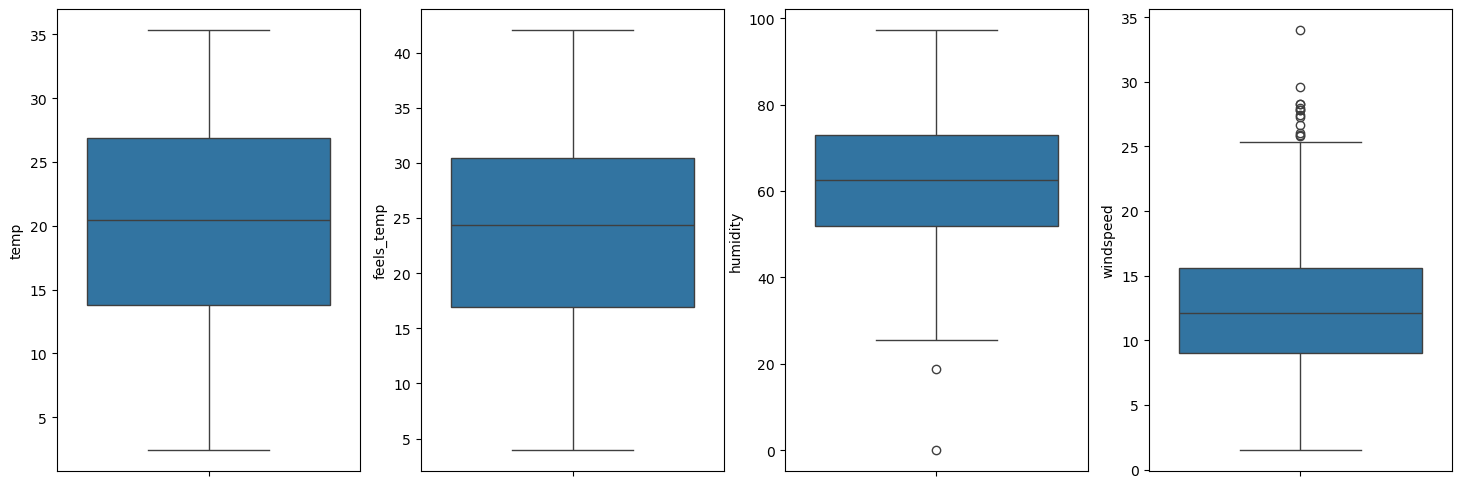

In [1214]:
# Draw box plots for indepent variables with continuous values

cols=['temp', 'feels_temp', 'humidity', 'windspeed']
plt.figure(figsize=(18,6))

i=1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col,data=bikes_df)
    i+=1

#### From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

# 4. Exploratory Data Analysis

In [1217]:
bikes_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'feels_temp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [1218]:
# mapping the values in 'season' to string values as given in the data dictionary

bikes_df.season=bikes_df.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# mapping the values in month column based on the values given in the data dictionary

bikes_df.month=bikes_df.month.map({1:'January',2:'February',3:'March', 4:'April', 5:'May', 6:'June', 7:'July'
                                 ,8:'August',9:'September',10:'October',11:'November',12:'December'})

# mapping the values in 'weathersit' to string values as given in the data dictionary

bikes_df.weather=bikes_df.weather.map({1:'Clear',2:'Mist',3:'Light rain',4:'Heavy rain'})

# mapping the values in 'weekday' column based on the values given the data dictionary

bikes_df.weekday = bikes_df.weekday.map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})


In [1219]:
bikes_df.head()

season  year    month  holiday    weekday  workingday weather       temp  \
0  Spring     0  January        0   Saturday           0    Mist  14.110847   
1  Spring     0  January        0     Sunday           0    Mist  14.902598   
2  Spring     0  January        0     Monday           1   Clear   8.050924   
3  Spring     0  January        0    Tuesday           1   Clear   8.200000   
4  Spring     0  January        0  Wednesday           1   Clear   9.305237   

   feels_temp  humidity  windspeed   cnt  
0    18.18125   80.5833  10.749882   985  
1    17.68695   69.6087  16.652113   801  
2     9.47025   43.7273  16.636703  1349  
3    10.60610   59.0435  10.739832  1562  
4    11.46350   43.6957  12.522300  1600

#### 4.2 Draw pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

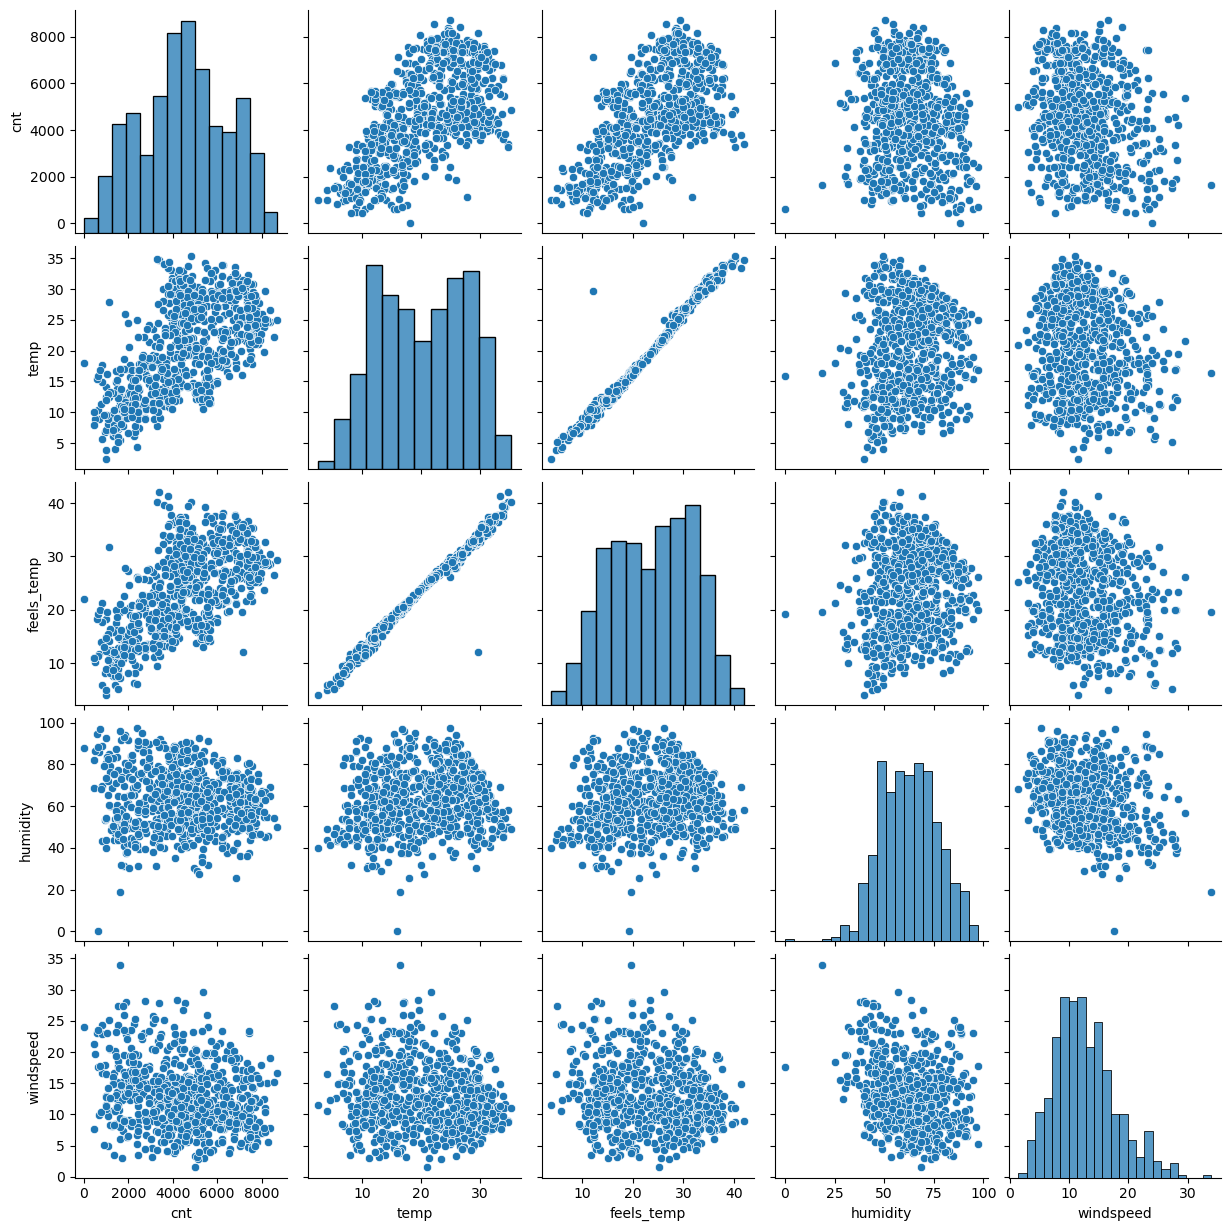

In [1221]:
plt.figure(figsize=(15,30))
sns.pairplot(data=bikes_df,vars=['cnt', 'temp', 'feels_temp', 'humidity','windspeed'])
plt.show()

#### Inference: 
- Looks like the temp and feels temp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 

#### 4.3 Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 2000x1500 with 0 Axes>

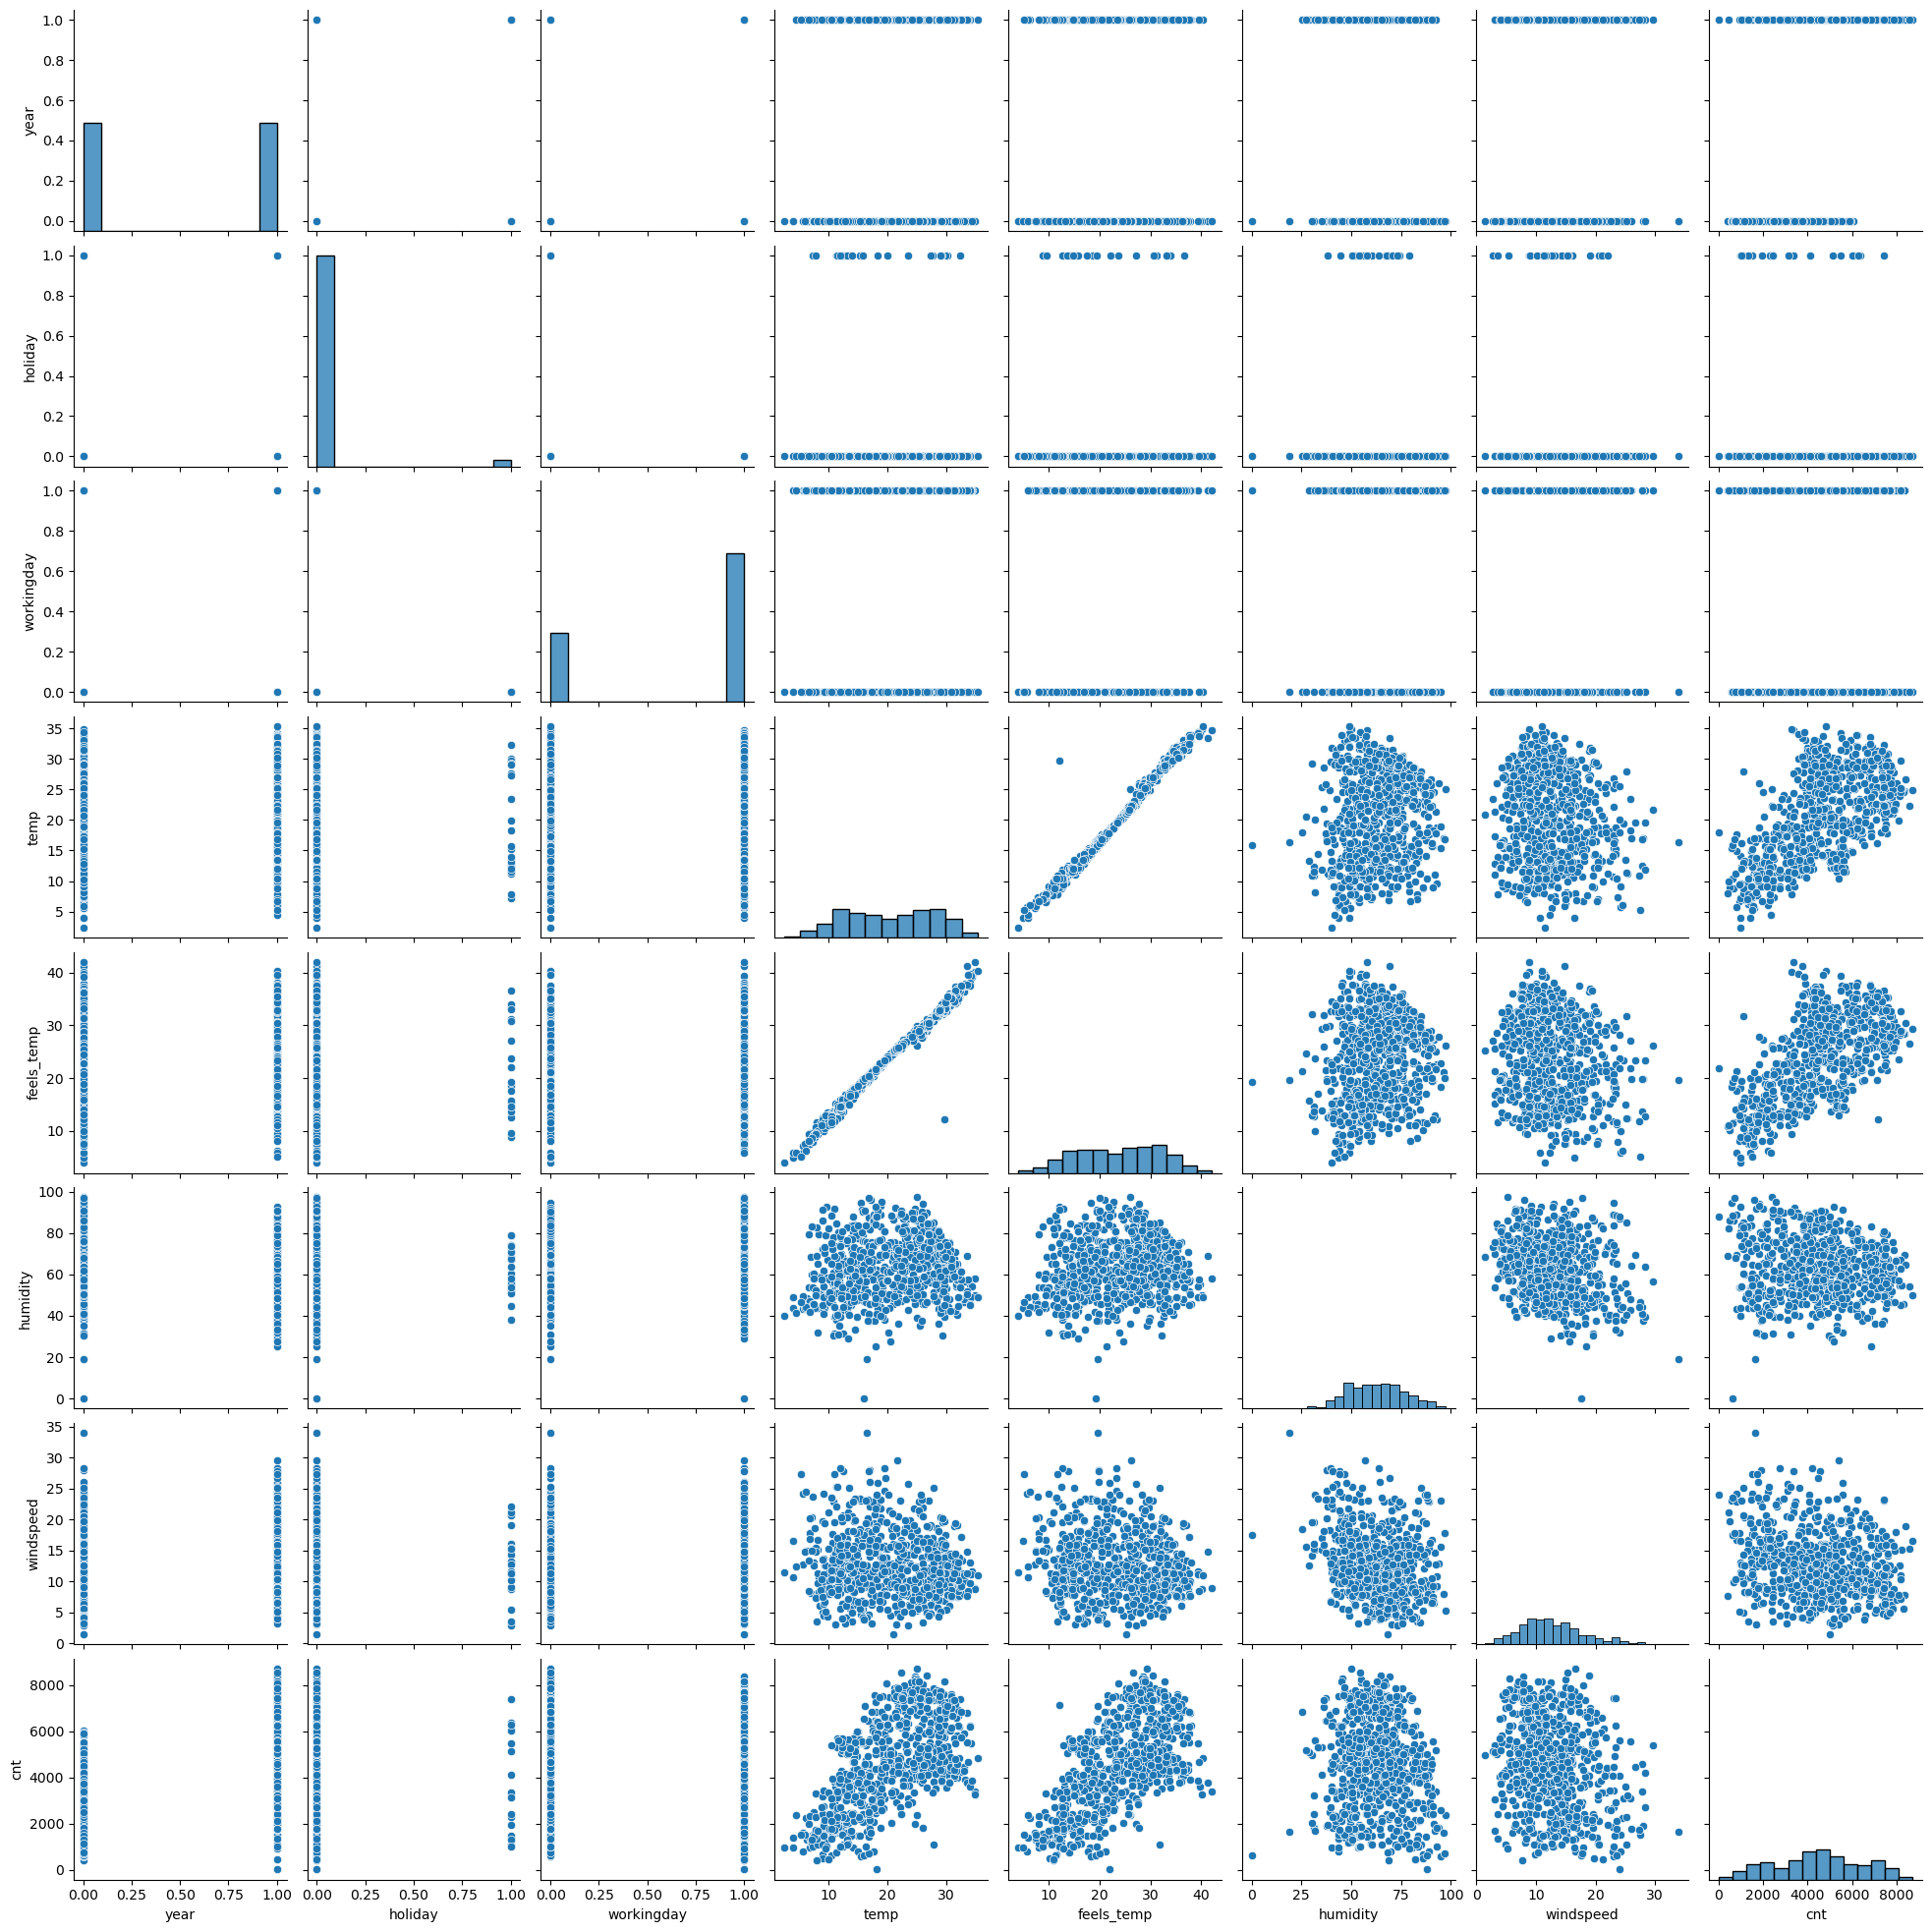

In [1224]:
plt.figure(figsize=(20,15))
sns.pairplot(bikes_df)
plt.show()

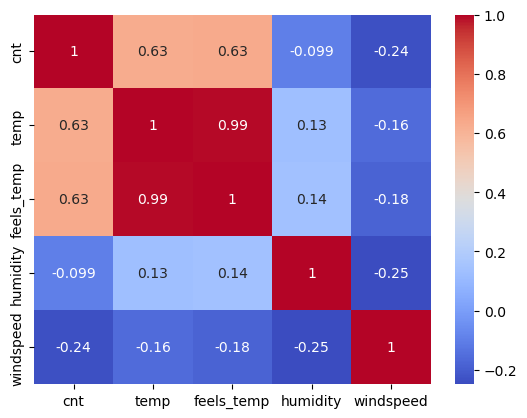

In [1225]:
# Checking continuous variables relationship with each other

sns.heatmap(bikes_df[['cnt', 'temp', 'feels_temp', 'humidity','windspeed']].corr(), cmap='coolwarm', annot=True)
plt.show()

#### Here we see that temp and feels temp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

In [1227]:
bikes_df.head()

season  year    month  holiday    weekday  workingday weather       temp  \
0  Spring     0  January        0   Saturday           0    Mist  14.110847   
1  Spring     0  January        0     Sunday           0    Mist  14.902598   
2  Spring     0  January        0     Monday           1   Clear   8.050924   
3  Spring     0  January        0    Tuesday           1   Clear   8.200000   
4  Spring     0  January        0  Wednesday           1   Clear   9.305237   

   feels_temp  humidity  windspeed   cnt  
0    18.18125   80.5833  10.749882   985  
1    17.68695   69.6087  16.652113   801  
2     9.47025   43.7273  16.636703  1349  
3    10.60610   59.0435  10.739832  1562  
4    11.46350   43.6957  12.522300  1600

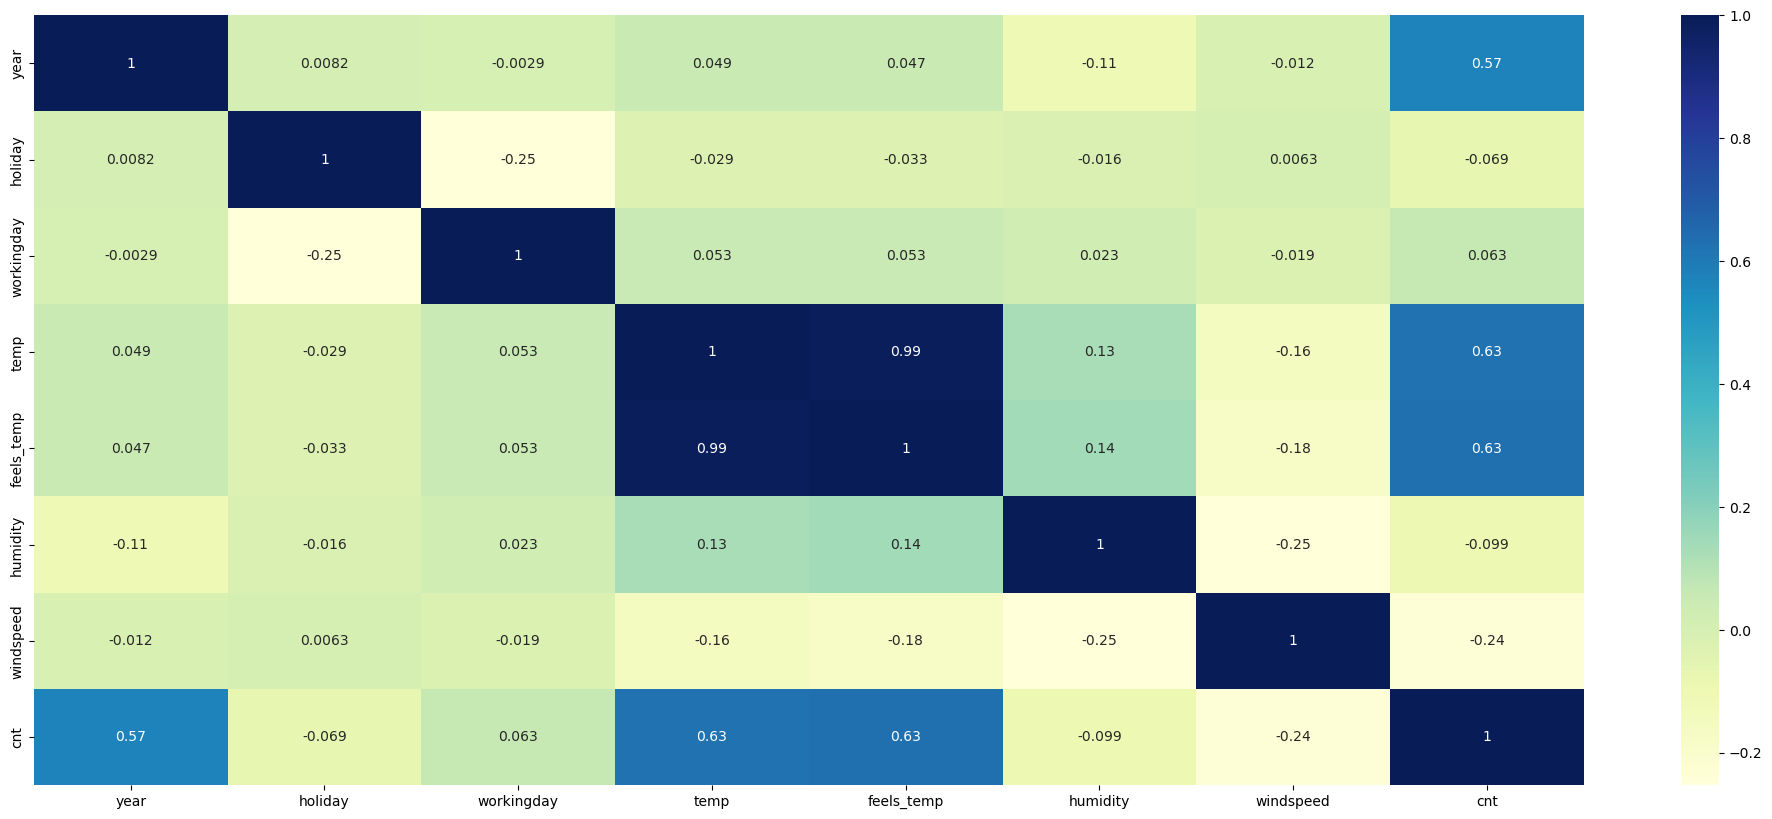

In [1228]:
#Correlations for numeric variables
plt.figure(figsize=(25,10))
cor=bikes_df[[ 'year', 'holiday',  'workingday'
       , 'temp', 'feels_temp', 'humidity', 'windspeed', 'cnt']].corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

#### We also see Target variable has a linear relationship with some of the  indeptendent variables. Good sign for building a linear regression Model.

#### 4.5 Analysing Categorical Variabels with target variables 

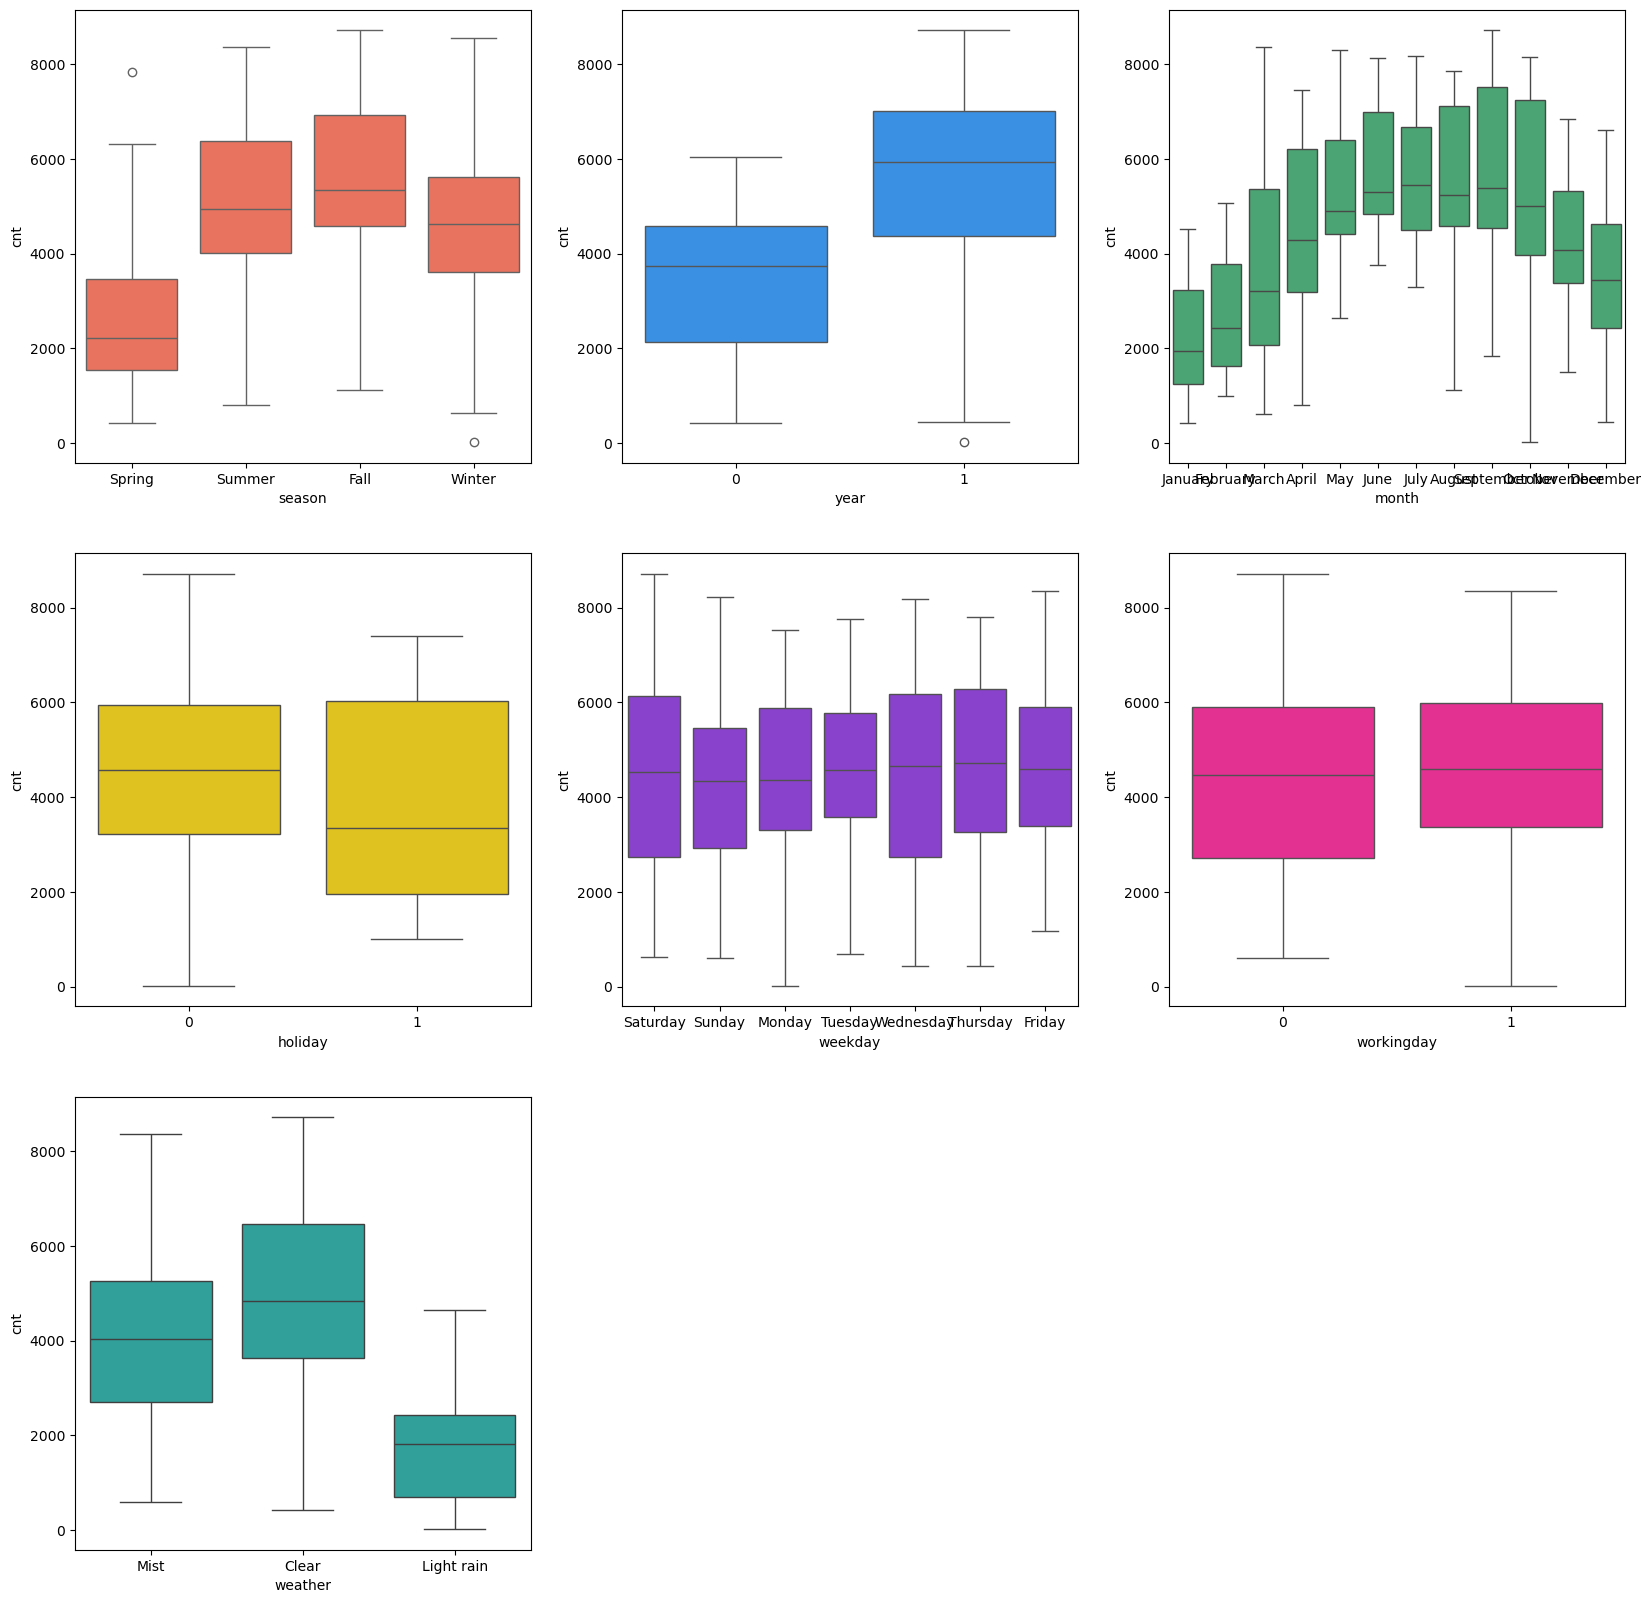

In [1231]:
vars = ['season','year','month','holiday','weekday','workingday','weather']
colors = ['#FF6347', '#1E90FF', '#3CB371', '#FFD700', '#8A2BE2', '#FF1493', '#20B2AA']
plt.figure(figsize=(20, 20))

for i,vars in enumerate(vars,1):
    plt.subplot(3,3,i)
    sns.boxplot(data=bikes_df,x=vars,y='cnt',color=colors[i-1])

plt.show()

#### Inference:
    Here many insights can be drawn from the plots

    1. Season: 3:fall has highest demand for rental bikes
    2. I see that demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weather has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less.

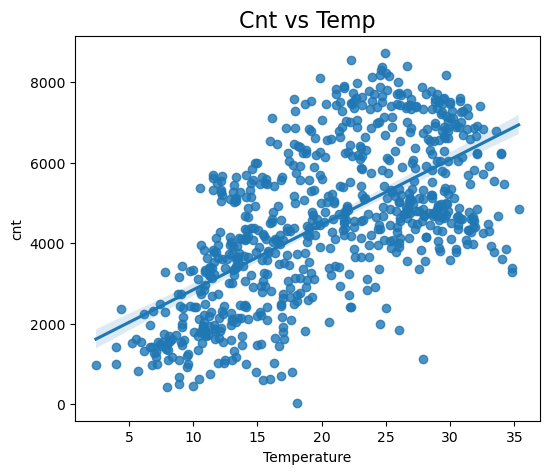

In [1233]:
plt.figure(figsize=(6,5))
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikes_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### Inference:
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

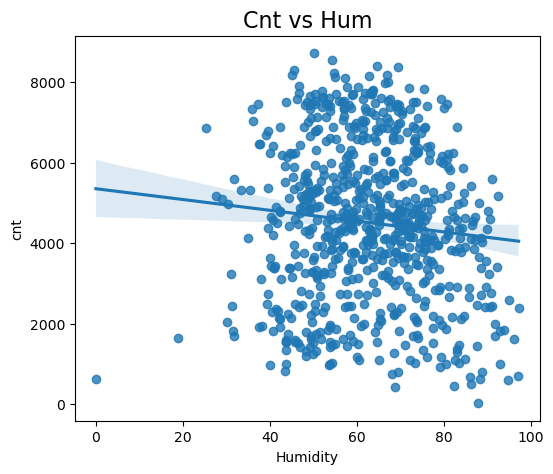

In [1235]:
plt.figure(figsize=(6,5))
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikes_df,y="cnt",x="humidity")
plt.xlabel("Humidity")
plt.show()

####  Inference:
- Hum is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

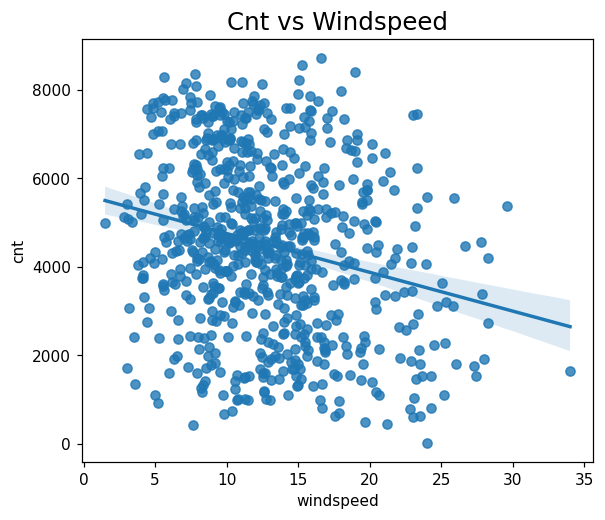

In [1237]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikes_df,y="cnt",x="windspeed")
plt.show()

#### Inference:
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

In [1239]:
def col_and_year(col):
    plt.figure(figsize=(12,12))
    plt.subplot(2,2,1)
    sns.barplot(x=col, y="cnt", data=bikes_df,palette="Set2")
    plt.subplot(2,2,2)
    sns.barplot(x=col, y="cnt", data=bikes_df, hue="year",palette="Set2"  )
    plt.legend(labels=["2018","2019"])
    plt.subplot(2,2,3)
    sns.boxplot(x=col, y="cnt", data=bikes_df,palette="Set2" )
    plt.subplot(2,2,4)
    sns.boxplot(x=col, y="cnt", data=bikes_df, hue="year",palette="Set2")
    # plt.legend(labels=["2018","2019"])
    plt.show()

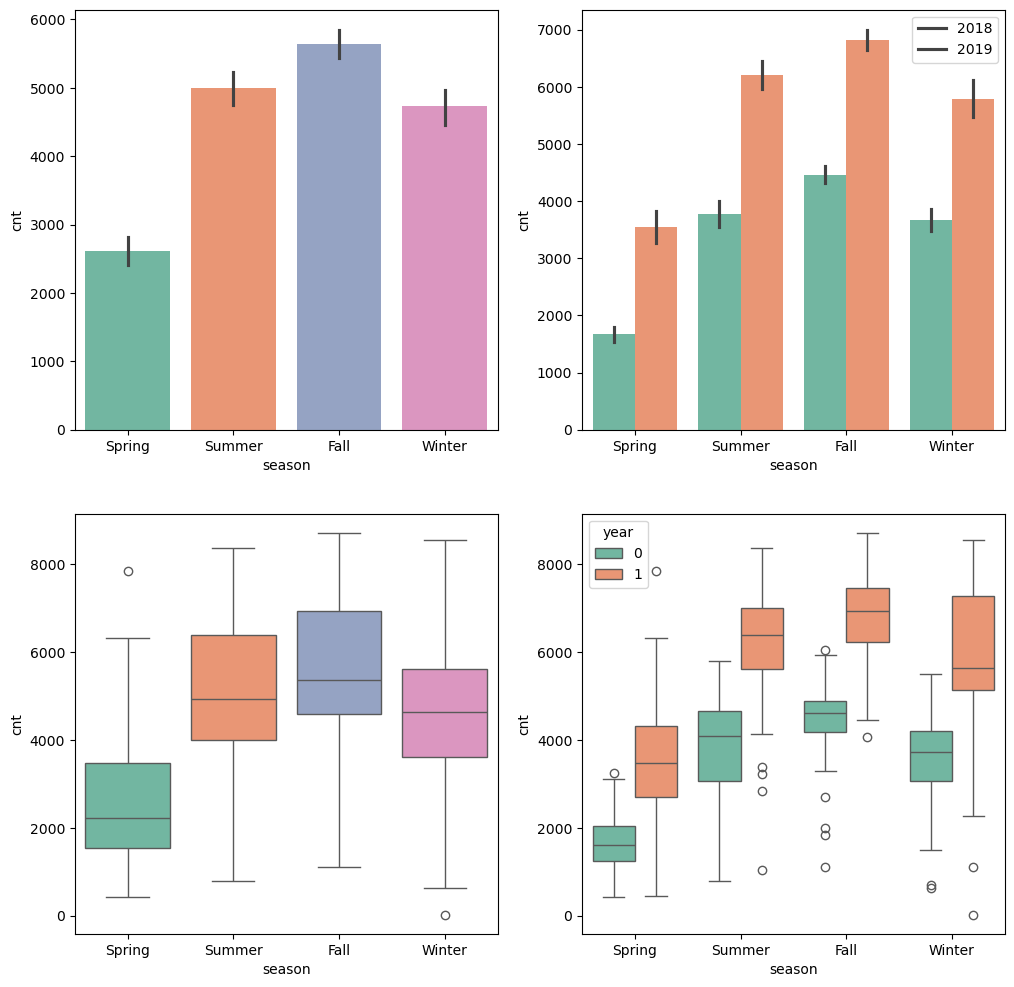

In [1240]:
col_and_year("season")

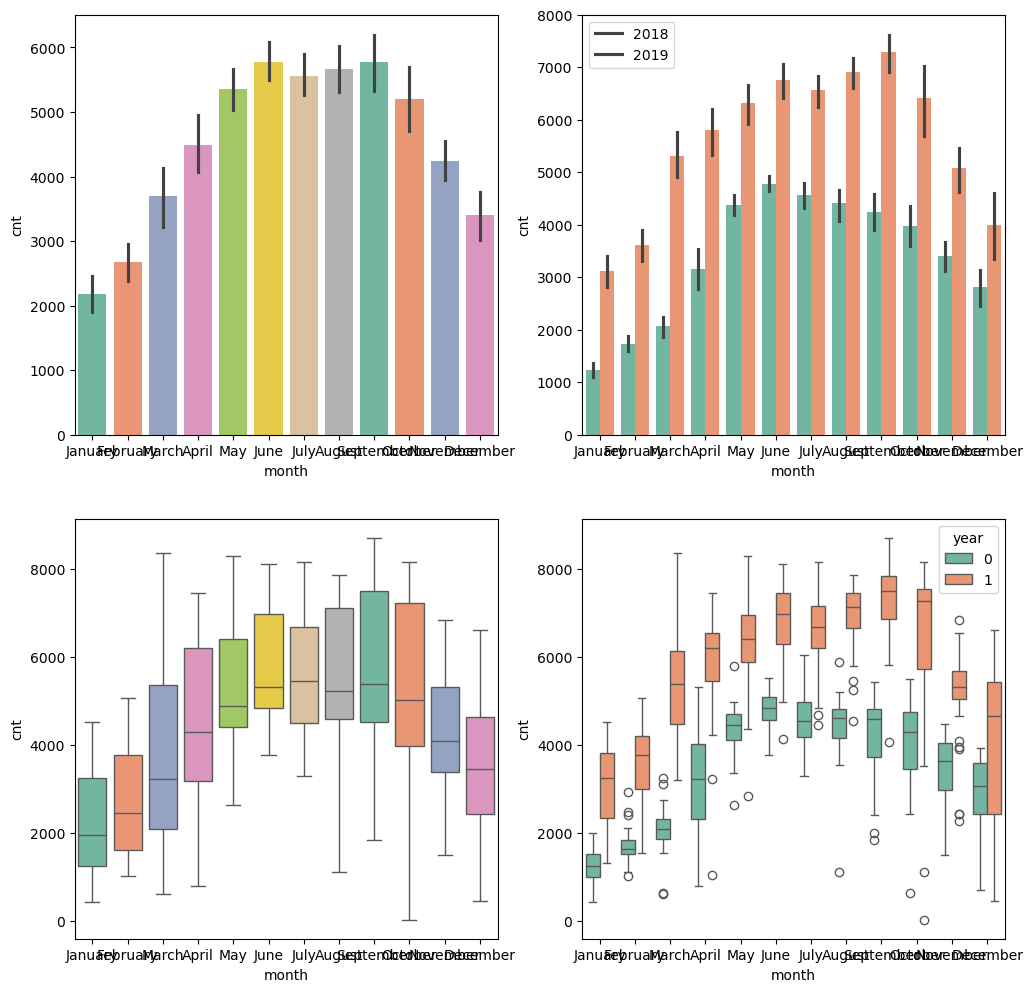

In [1241]:
col_and_year("month")

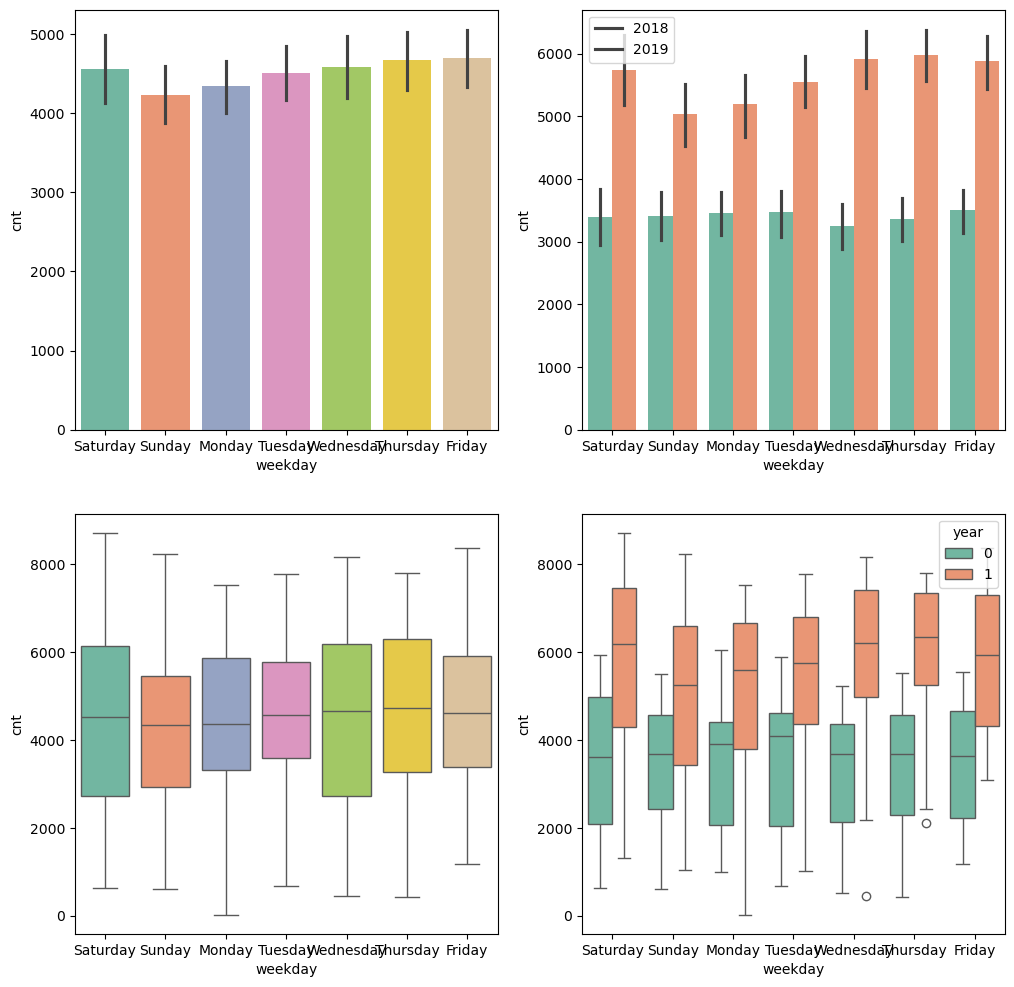

In [1242]:
col_and_year("weekday")

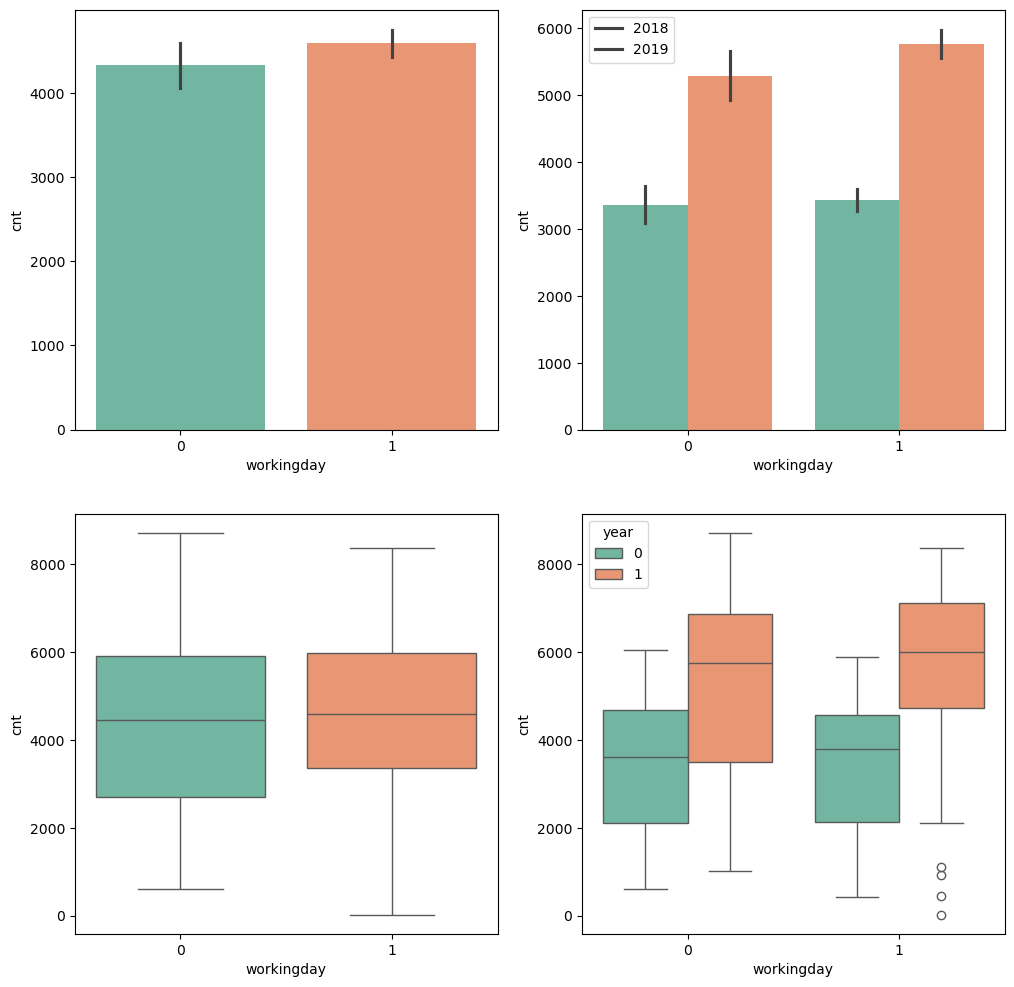

In [1243]:
col_and_year("workingday")


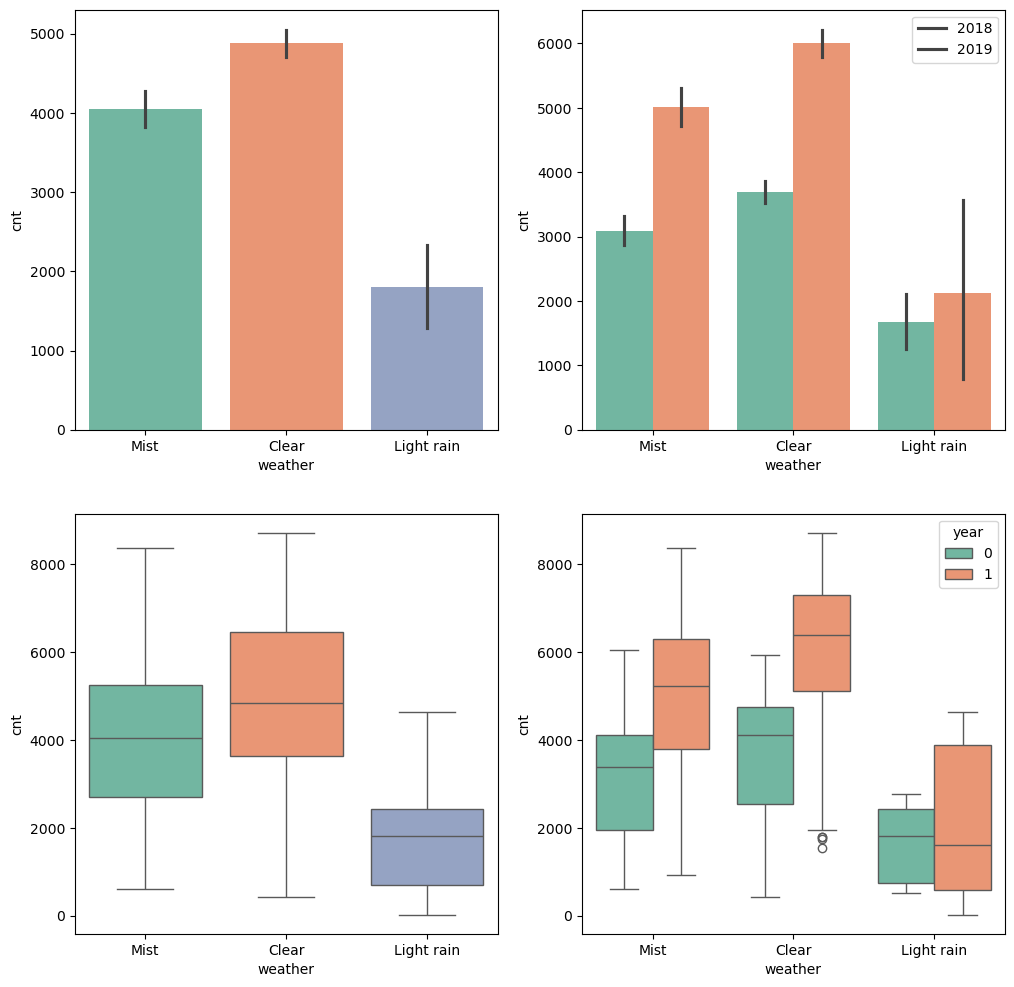

In [1244]:
col_and_year('weather')

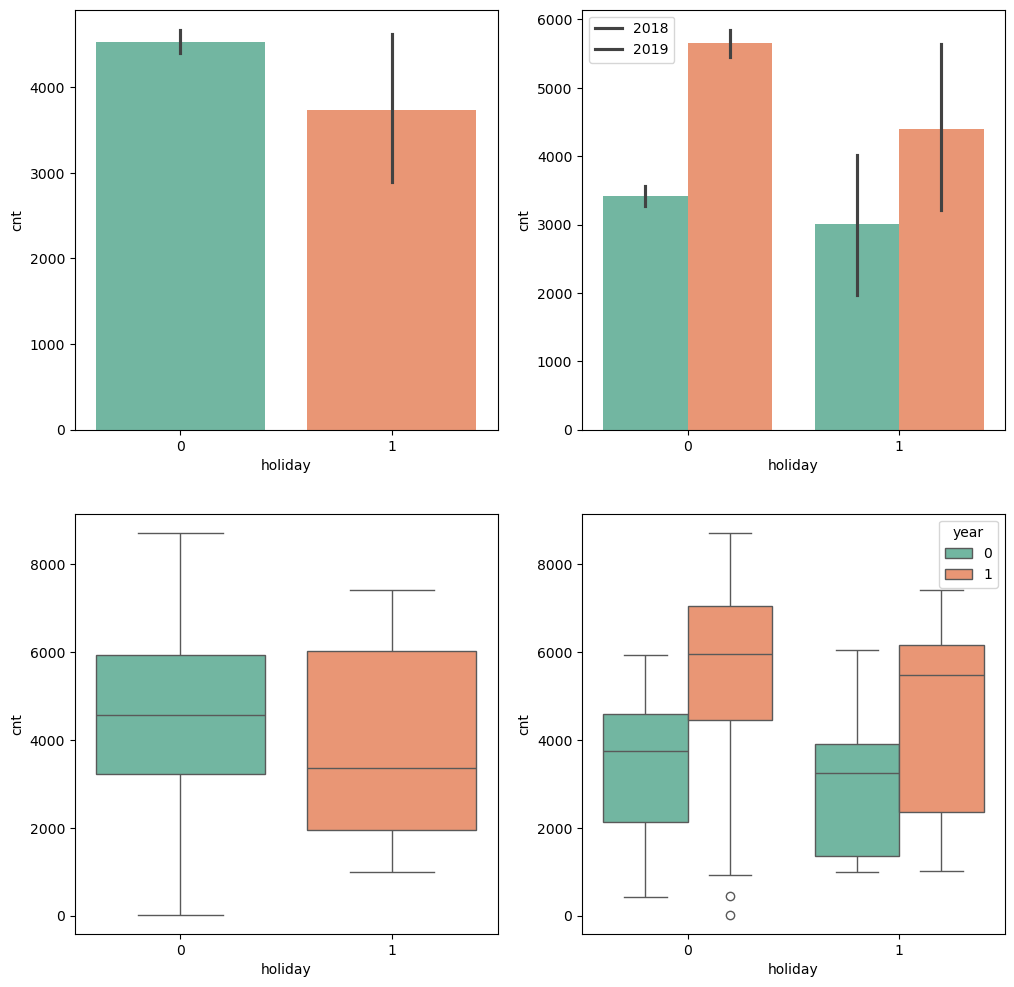

In [1245]:
col_and_year('holiday')

In [1246]:
bikes_df.describe()

year     holiday  workingday        temp  feels_temp    humidity  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.465405    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt  
count  730.000000   730.000000  
mean    12.763620  4508.006849  
std      5.195841  1936.011647  
min      1.500244    22.000000  
25%      9.041650  3169.750000  
50%     12.125325  4548.500000  
75%     15.625589  5966.000000  
max     34.000021  8714.000000

# 5. Data Preparation for Linear Regression 

#### 5.1 Create dummy variables for all categorical variables

In [1249]:
bikes_df.head()

season  year    month  holiday    weekday  workingday weather       temp  \
0  Spring     0  January        0   Saturday           0    Mist  14.110847   
1  Spring     0  January        0     Sunday           0    Mist  14.902598   
2  Spring     0  January        0     Monday           1   Clear   8.050924   
3  Spring     0  January        0    Tuesday           1   Clear   8.200000   
4  Spring     0  January        0  Wednesday           1   Clear   9.305237   

   feels_temp  humidity  windspeed   cnt  
0    18.18125   80.5833  10.749882   985  
1    17.68695   69.6087  16.652113   801  
2     9.47025   43.7273  16.636703  1349  
3    10.60610   59.0435  10.739832  1562  
4    11.46350   43.6957  12.522300  1600

In [1250]:
bikes_df=pd.get_dummies(data=bikes_df,columns=['season','month','weekday'],drop_first=True)
bikes_df=pd.get_dummies(data=bikes_df,columns=['weather'])


In [1251]:
bikes_df.head()

year  holiday  workingday       temp  feels_temp  humidity  windspeed  \
0     0        0           0  14.110847    18.18125   80.5833  10.749882   
1     0        0           0  14.902598    17.68695   69.6087  16.652113   
2     0        0           1   8.050924     9.47025   43.7273  16.636703   
3     0        0           1   8.200000    10.60610   59.0435  10.739832   
4     0        0           1   9.305237    11.46350   43.6957  12.522300   

    cnt  season_Spring  season_Summer  ...  month_September  weekday_Monday  \
0   985           True          False  ...            False           False   
1   801           True          False  ...            False           False   
2  1349           True          False  ...            False            True   
3  1562           True          False  ...            False           False   
4  1600           True          False  ...            False           False   

   weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
0              True           False             False            False   
1             False            True             False            False   
2             False           False             False            False   
3             False           False             False             True   
4             False           False             False            False   

   weekday_Wednesday  weather_Clear  weather_Light rain  weather_Mist  
0              False          False               False          True  
1              False          False               False          True  
2              False           True               False         False  
3              False           True               False         False  
4               True           True               False         False  

[5 rows x 31 columns]

In [1252]:
bikes_df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'feels_temp', 'humidity',
       'windspeed', 'cnt', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weather_Clear',
       'weather_Light rain', 'weather_Mist'],
      dtype='object')

# 6. Model Building

## 6.1 Split Data into training and test

In [1255]:
bikes_df.shape

(730, 31)

In [1256]:
# #y to contain only target variable
# y=bikes_df['cnt']

# #X is all remainign variable also our independent variables
# X = bikes_df.drop('cnt', axis=1)

#Train Test split with 70:30 ratio
df_train, df_test= train_test_split(bikes_df, test_size=0.3, random_state=42)

### 6.2  Scaling continuous variables

In [1258]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [1259]:
# Let us scale continuous variables
num_vars = ['temp','feels_temp','humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1260]:
y_train = df_train.pop('cnt')
X_train = df_train

In [1261]:
# Checking shape and size for train and test
print(df_train.shape)


(511, 30)


In [1262]:
df_train.describe()

year     holiday  workingday        temp  feels_temp    humidity  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.520548    0.027397    0.669276    0.550874    0.526518    0.654174   
std      0.500067    0.163398    0.470935    0.227231    0.212976    0.143648   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.354221    0.353207    0.544598   
50%      1.000000    0.000000    1.000000    0.575304    0.563297    0.659940   
75%      1.000000    0.000000    1.000000    0.745079    0.698389    0.756977   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed  
count  511.000000  
mean     0.414873  
std      0.185619  
min      0.000000  
25%      0.281934  
50%      0.384732  
75%      0.526481  
max      1.000000

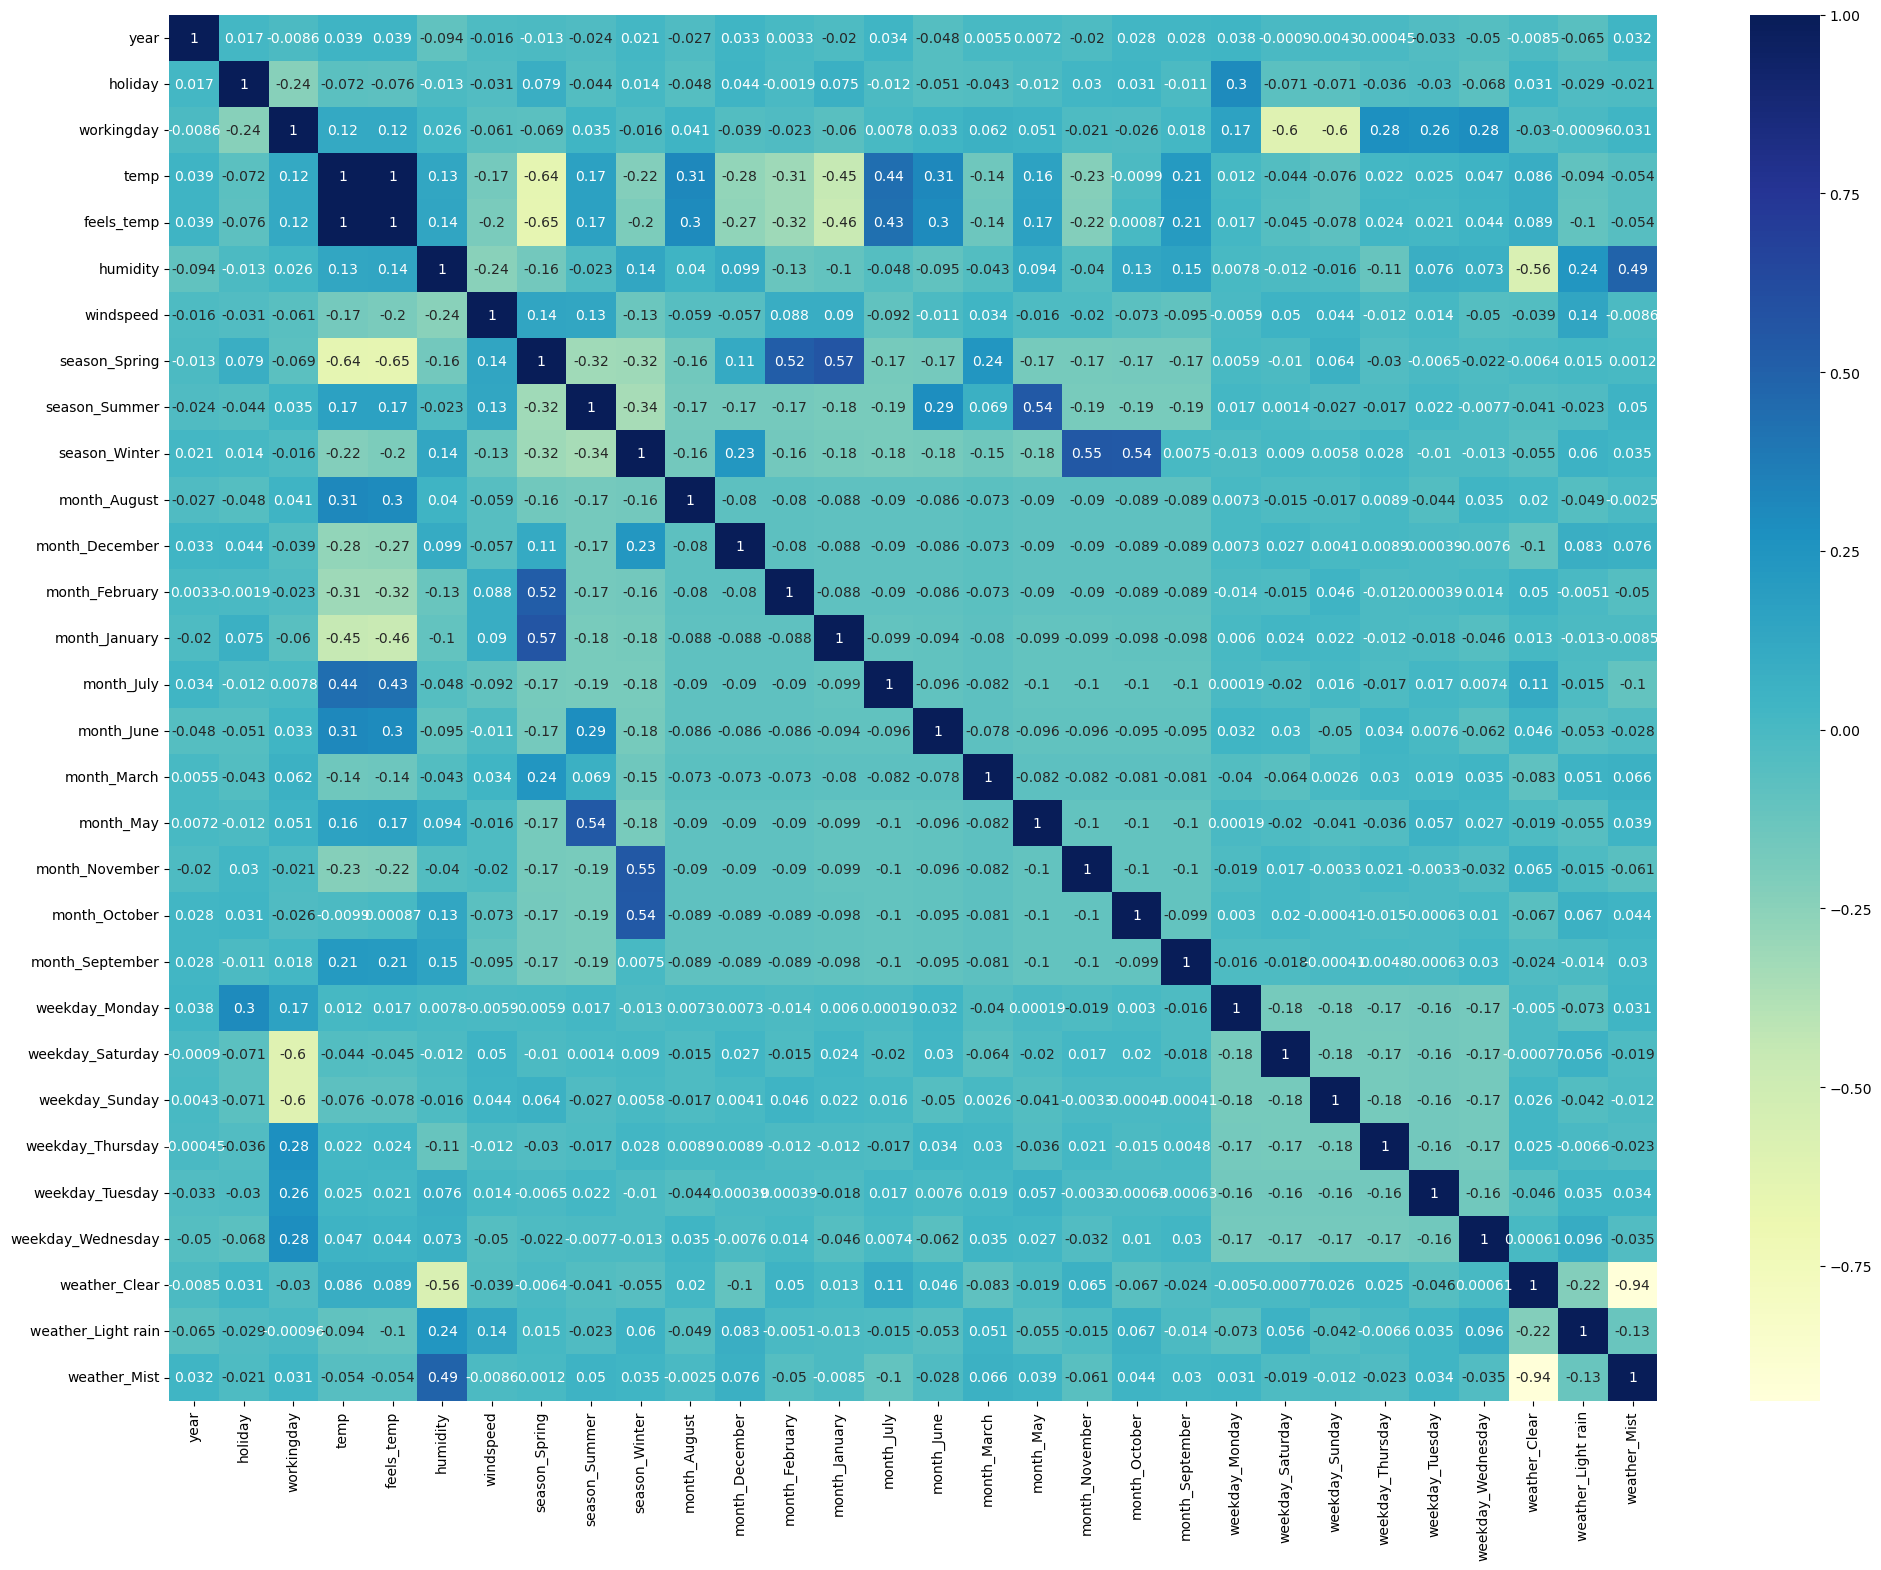

In [1263]:
plt.figure(figsize = (24,18))
sns.heatmap(df_train.corr() , annot=True , cmap = 'YlGnBu')
plt.show()

## 6.3 Build a Model using RFE and Automated approach

#### Use RFE to eliminate some columns

In [1265]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [1266]:
#Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [1267]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('feels_temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 12),
 ('season_Winter', True, 1),
 ('month_August', False, 7),
 ('month_December', True, 1),
 ('month_February', False, 9),
 ('month_January', False, 15),
 ('month_July', True, 1),
 ('month_June', False, 16),
 ('month_March', True, 1),
 ('month_May', False, 5),
 ('month_November', True, 1),
 ('month_October', False, 6),
 ('month_September', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 10),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 13),
 ('weather_Clear', True, 1),
 ('weather_Light rain', True, 1),
 ('weather_Mist', False, 4)]

In [1268]:
cols=X_train.columns[rfe.support_]

In [1269]:
cols

Index(['year', 'temp', 'feels_temp', 'humidity', 'windspeed', 'season_Spring',
       'season_Winter', 'month_December', 'month_July', 'month_March',
       'month_November', 'month_September', 'weekday_Saturday',
       'weather_Clear', 'weather_Light rain'],
      dtype='object')

In [1270]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_Summer', 'month_August',
       'month_February', 'month_January', 'month_June', 'month_May',
       'month_October', 'weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weather_Mist'],
      dtype='object')

In [1271]:
X_train_rfe = X_train[cols]
X_train_rfe.head()

year      temp  feels_temp  humidity  windspeed  season_Spring  \
683     1  0.327133    0.322150  0.639330   0.327101          False   
645     1  0.403972    0.404998  0.731215   0.419004          False   
163     0  0.717562    0.685963  0.509660   0.708724          False   
360     0  0.331287    0.326273  0.785745   0.415925           True   
640     1  0.745598    0.682653  0.817947   0.110593          False   

     season_Winter  month_December  month_July  month_March  month_November  \
683           True           False       False        False            True   
645           True           False       False        False           False   
163          False           False       False        False           False   
360          False            True       False        False           False   
640           True           False       False        False           False   

     month_September  weekday_Saturday  weather_Clear  weather_Light rain  
683            False             False          False               False  
645            False             False          False               False  
163            False             False           True               False  
360            False             False          False               False  
640            False             False          False               False

##### Function to build a model using statsmodel api

In [1273]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter

# def build_model(cols):
#     X_train_sm=sm.add_constant(X_train[cols])
#     lm= sm.OLS(y_train,X_train_sm).fit()
#     print(lm.summary())
#     return lm



In [1274]:
# #Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
# def get_vif(cols):
#     df1 = X_train[cols]
#     vif = pd.DataFrame()
#     vif['Features'] = df1.columns
#     vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
#     vif['VIF'] = round(vif['VIF'],2)
#     print(vif.sort_values(by='VIF',ascending=False))

### 6.1 Model 1 - Start with all variables selected by RFE

In [1276]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 683 to 102
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                511 non-null    int64  
 1   temp                511 non-null    float64
 2   feels_temp          511 non-null    float64
 3   humidity            511 non-null    float64
 4   windspeed           511 non-null    float64
 5   season_Spring       511 non-null    bool   
 6   season_Winter       511 non-null    bool   
 7   month_December      511 non-null    bool   
 8   month_July          511 non-null    bool   
 9   month_March         511 non-null    bool   
 10  month_November      511 non-null    bool   
 11  month_September     511 non-null    bool   
 12  weekday_Saturday    511 non-null    bool   
 13  weather_Clear       511 non-null    bool   
 14  weather_Light rain  511 non-null    bool   
dtypes: bool(10), float64(4), int64(1)
memory usage: 28.9 KB


In [1277]:
lm = sm.OLS(y_train , X_train_rfe.astype(float)).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1156.
Date:                Sat, 25 Jan 2025   Prob (F-statistic):                        0.00
Time:                        13:51:13   Log-Likelihood:                         -4156.7
No. Observations:                 511   AIC:                                      8343.
Df Residuals:                     496   BIC:                                      8407.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [1278]:

# Find all the bool columns in the dataframe
bool_columns = X_train_rfe.select_dtypes(include=['bool']).columns

# Convert the bool columns to int (True becomes 1, False becomes 0)
X_train_rfe[bool_columns] = X_train_rfe[bool_columns].astype(int)

X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 683 to 102
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                511 non-null    int64  
 1   temp                511 non-null    float64
 2   feels_temp          511 non-null    float64
 3   humidity            511 non-null    float64
 4   windspeed           511 non-null    float64
 5   season_Spring       511 non-null    int32  
 6   season_Winter       511 non-null    int32  
 7   month_December      511 non-null    int32  
 8   month_July          511 non-null    int32  
 9   month_March         511 non-null    int32  
 10  month_November      511 non-null    int32  
 11  month_September     511 non-null    int32  
 12  weekday_Saturday    511 non-null    int32  
 13  weather_Clear       511 non-null    int32  
 14  weather_Light rain  511 non-null    int32  
dtypes: float64(4), int32(10), int64(1)
memory usage: 43.9 KB


In [1279]:
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

              Features      VIF
2           feels_temp  1236.56
1                 temp  1199.18
3             humidity    20.41
4            windspeed     5.53
13       weather_Clear     3.28
5        season_Spring     3.01
6        season_Winter     2.81
0                 year     2.09
10      month_November     1.86
8           month_July     1.49
7       month_December     1.38
11     month_September     1.25
12    weekday_Saturday     1.19
14  weather_Light rain     1.19
9          month_March     1.18


## Model 2

In [1281]:
# Dropping the variable temp as it has high p-value
X_train_rfe_new=X_train_rfe.drop(['temp'], axis=1)

In [1282]:
X_train_rfe = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train , X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.1
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          4.16e-186
Time:                        13:51:14   Log-Likelihood:                -4126.6
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2692.3562    341

In [1283]:
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

              Features    VIF
0                const  95.87
2           feels_temp   3.56
5        season_Spring   2.91
6        season_Winter   2.19
3             humidity   1.88
10      month_November   1.72
13       weather_Clear   1.64
8           month_July   1.35
7       month_December   1.28
4            windspeed   1.22
14  weather_Light rain   1.15
11     month_September   1.13
9          month_March   1.11
1                 year   1.03
12    weekday_Saturday   1.01


## Model 3

In [1285]:
# Dropping the variable weekday_Saturday as it has high p-value
X_train_rfe_new=X_train_rfe.drop(['weekday_Saturday'], axis=1)
X_train_rfe = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train , X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          8.61e-187
Time:                        13:51:14   Log-Likelihood:                -4127.7
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     497   BIC:                             8343.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2729.1199    341

In [1286]:
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

              Features    VIF
0                const  95.37
2           feels_temp   3.55
5        season_Spring   2.90
6        season_Winter   2.18
3             humidity   1.88
10      month_November   1.72
12       weather_Clear   1.64
8           month_July   1.35
7       month_December   1.28
4            windspeed   1.22
13  weather_Light rain   1.14
11     month_September   1.13
9          month_March   1.10
1                 year   1.03


## Model 4

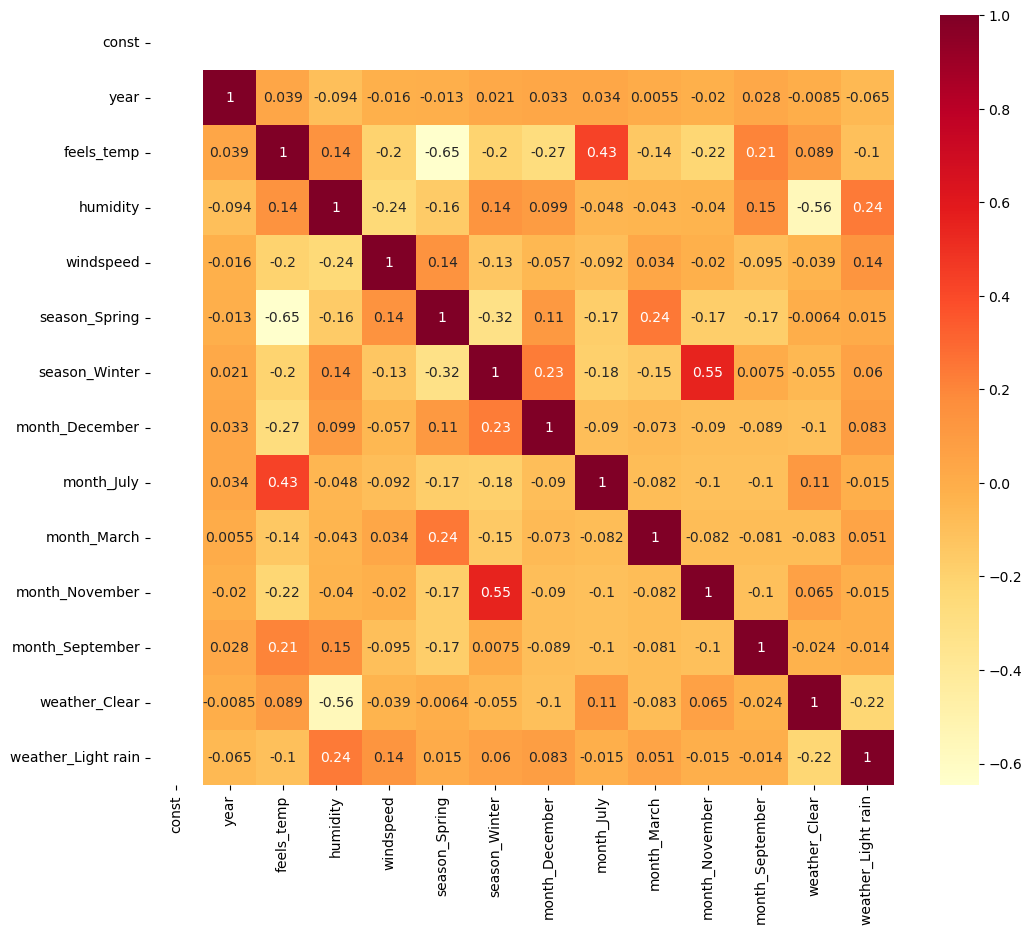

In [1288]:
plt.figure(figsize = (12,10))
sns.heatmap(X_train_rfe.corr() , annot=True, cmap= 'YlOrRd' )
plt.show()
# Dropping the variable feels_temp   as it has high VIF


In [1289]:
X_train_rfe_new=X_train_rfe.drop(['month_November'], axis=1)
X_train_rfe = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train , X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.3
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          5.43e-184
Time:                        13:51:15   Log-Likelihood:                -4137.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     498   BIC:                             8355.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2517.0806    343

In [1290]:
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

              Features    VIF
0                const  93.40
2           feels_temp   3.31
5        season_Spring   2.81
3             humidity   1.88
6        season_Winter   1.78
11       weather_Clear   1.63
8           month_July   1.35
4            windspeed   1.22
7       month_December   1.16
12  weather_Light rain   1.14
10     month_September   1.12
9          month_March   1.10
1                 year   1.03


## Model 5

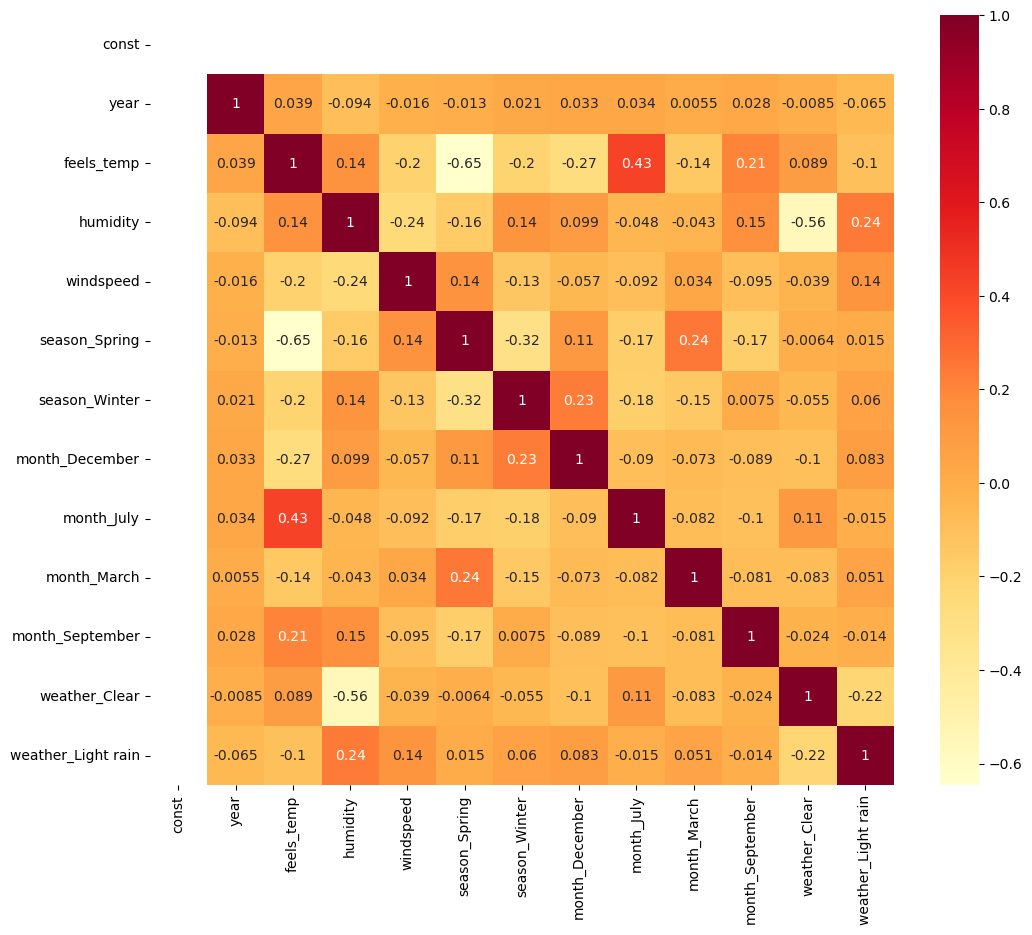

In [1292]:
plt.figure(figsize = (12,10))
sns.heatmap(X_train_rfe.corr() , annot=True, cmap= 'YlOrRd' )
plt.show()


In [1293]:
X_train_rfe_new=X_train_rfe.drop(['month_July'], axis=1)
X_train_rfe = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train , X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     217.1
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          3.40e-182
Time:                        13:51:16   Log-Likelihood:                -4144.2
No. Observations:                 511   AIC:                             8312.
Df Residuals:                     499   BIC:                             8363.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2602.6065    347

In [1294]:
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

              Features    VIF
0                const  92.98
2           feels_temp   2.86
5        season_Spring   2.78
3             humidity   1.86
6        season_Winter   1.78
10       weather_Clear   1.63
4            windspeed   1.21
7       month_December   1.16
11  weather_Light rain   1.13
8          month_March   1.10
9      month_September   1.08
1                 year   1.03


## Model 6

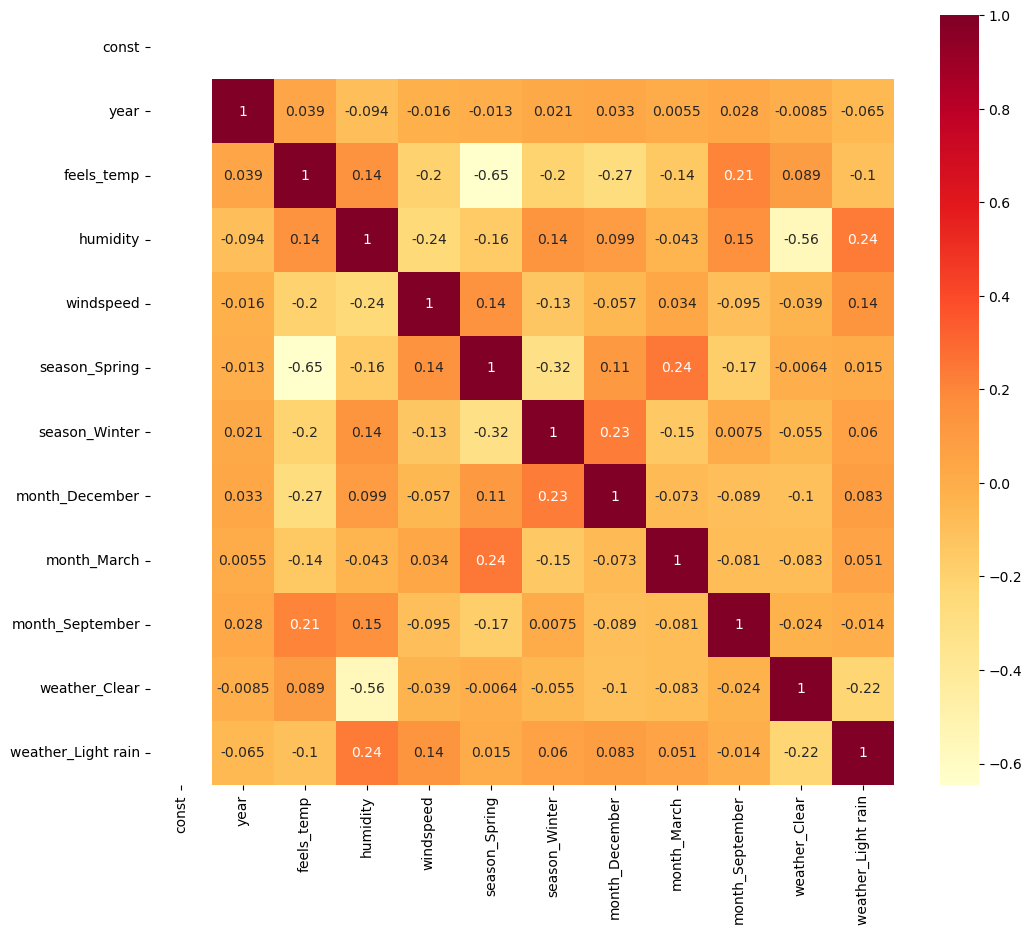

In [1296]:
plt.figure(figsize = (12,10))
sns.heatmap(X_train_rfe.corr() , annot=True, cmap= 'YlOrRd' )
plt.show()


## Model 7

In [1298]:
# Dropping the humidity  as it has high p-value
X_train_rfe_new=X_train_rfe.drop(['humidity'], axis=1)
X_train_rfe = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train , X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.2
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          2.40e-180
Time:                        13:51:17   Log-Likelihood:                -4151.4
No. Observations:                 511   AIC:                             8325.
Df Residuals:                     500   BIC:                             8371.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1636.5481    238

In [1299]:
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

              Features    VIF
0                const  42.63
2           feels_temp   2.78
4        season_Spring   2.77
5        season_Winter   1.76
6       month_December   1.15
3            windspeed   1.12
7          month_March   1.09
10  weather_Light rain   1.09
9        weather_Clear   1.08
8      month_September   1.06
1                 year   1.01


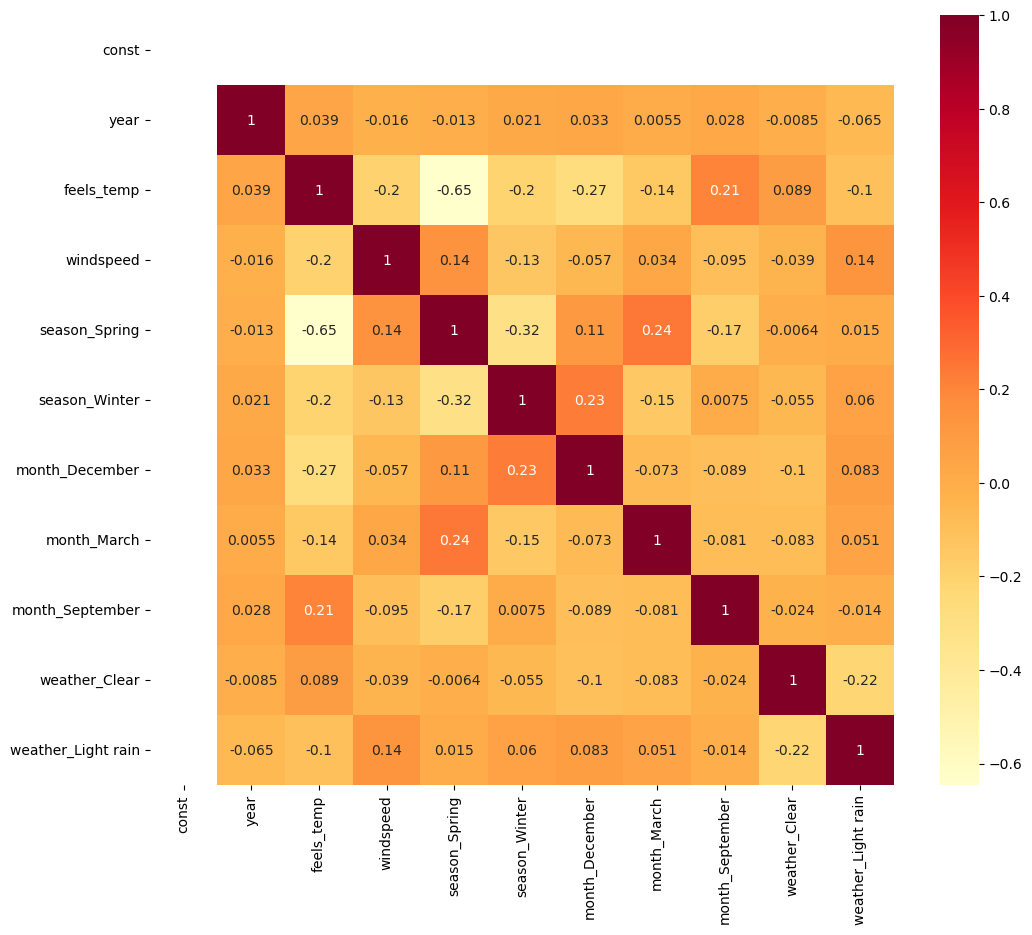

In [1300]:
plt.figure(figsize = (12,10))
sns.heatmap(X_train_rfe.corr() , annot=True, cmap= 'YlOrRd' )
plt.show()

In [1301]:
X_train_rfe_new=X_train_rfe.drop(['month_December'], axis=1)
X_train_rfe = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train , X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.4
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          3.72e-180
Time:                        13:51:18   Log-Likelihood:                -4154.7
No. Observations:                 511   AIC:                             8329.
Df Residuals:                     501   BIC:                             8372.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1540.9050    236

In [1302]:
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

             Features    VIF
0               const  41.58
4       season_Spring   2.77
2          feels_temp   2.73
5       season_Winter   1.72
3           windspeed   1.11
9  weather_Light rain   1.09
6         month_March   1.08
8       weather_Clear   1.07
7     month_September   1.06
1                year   1.01


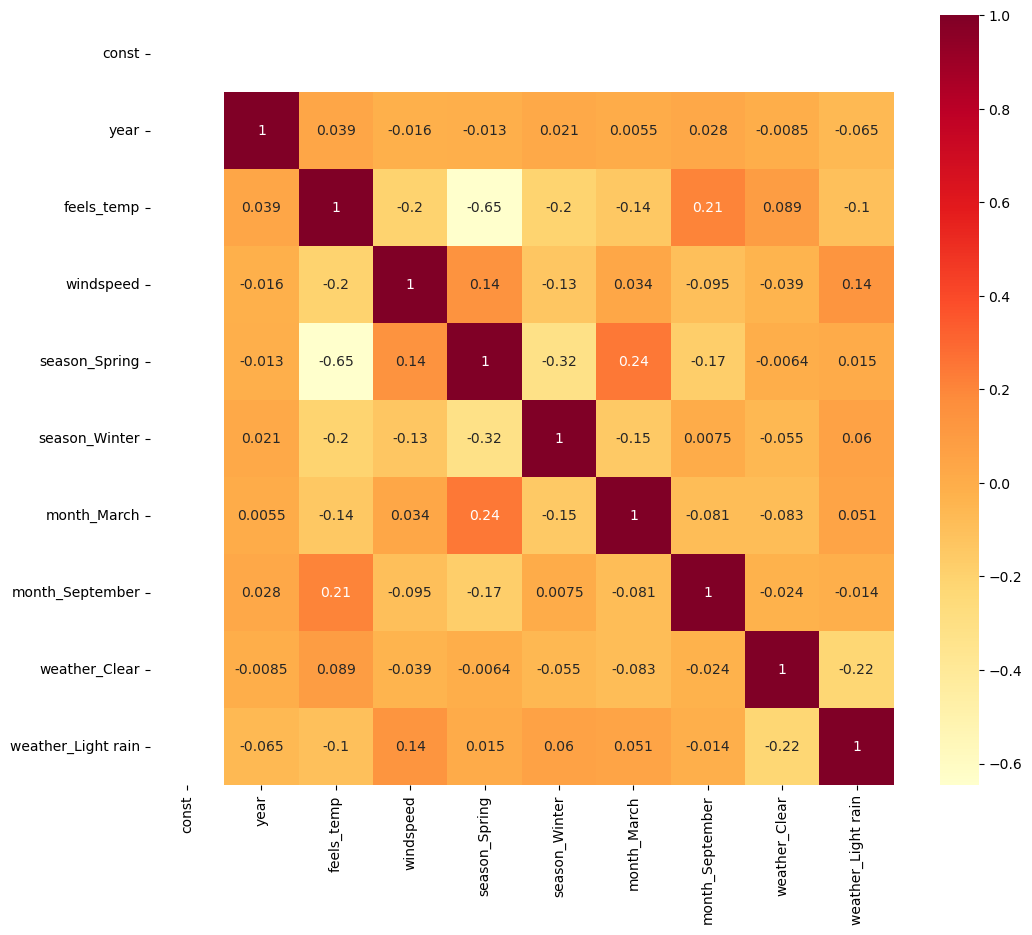

In [1303]:
plt.figure(figsize = (12,10))
sns.heatmap(X_train_rfe.corr() , annot=True, cmap= 'YlOrRd' )
plt.show()

In [1304]:
cols=X_train_rfe.columns
cols

Index(['const', 'year', 'feels_temp', 'windspeed', 'season_Spring',
       'season_Winter', 'month_March', 'month_September', 'weather_Clear',
       'weather_Light rain'],
      dtype='object')

## Step 7. Model Evaluation 
### 7.1 Residucal Analysis

In [1306]:
y_train_pred = lm.predict(X_train_rfe)

In [1307]:
res=y_train-y_train_pred
res.head()

683     467.451897
645     246.962027
163     689.180337
360     -38.217136
640    1120.236324
dtype: float64

In [1507]:
X_train_rfe.shape

(511, 10)

In [1505]:
res.shape

(219,)

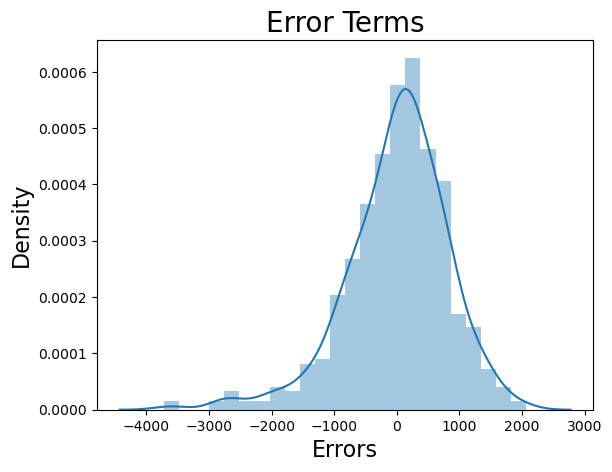

In [1308]:
sns.distplot(res)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.show()

#### Errors are normally distribured here with mean 0. So everything seems to be fine

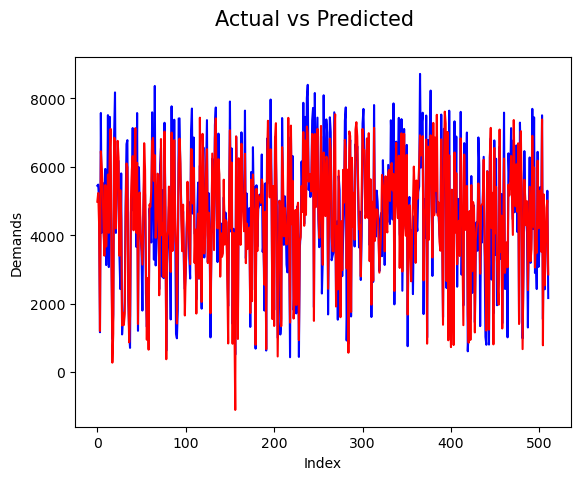

In [1489]:
# Actual vs Predicted
c = range(0, len(X_train))

# Plotting actual vs predicted values
plt.plot(c, y_train, color="blue")  # Plot actual values (y_train) in blue
plt.plot(c, y_train_pred, color="red")  # Plot predicted values (y_train_pred) in red

# Adding title and labels
plt.suptitle('Actual vs Predicted', fontsize=15)
plt.xlabel('Index')
plt.ylabel('Demands')

# Displaying the plot
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems ok

#### Here,If we see the error terms are independent of each other.

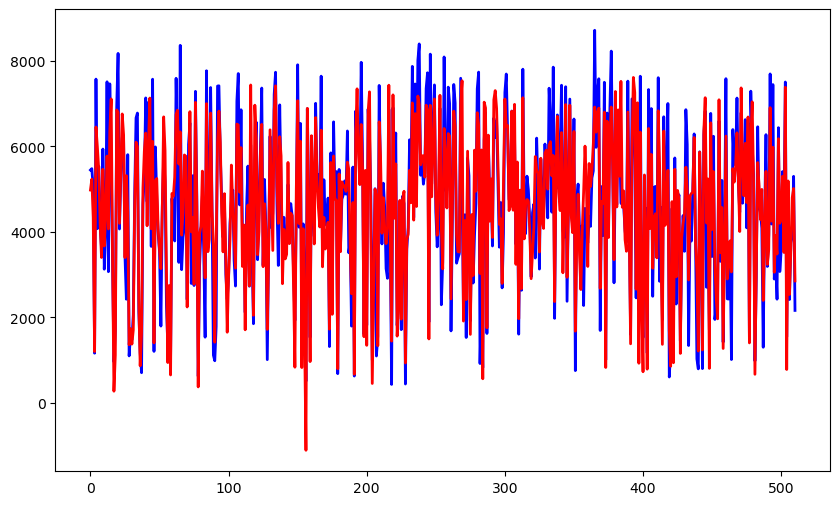

In [1543]:
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_train.values, label='Actual', color='blue', linewidth=2)

# Plot predicted values
plt.plot(y_train_pred.values, label='Predicted', color='red', linewidth=2)

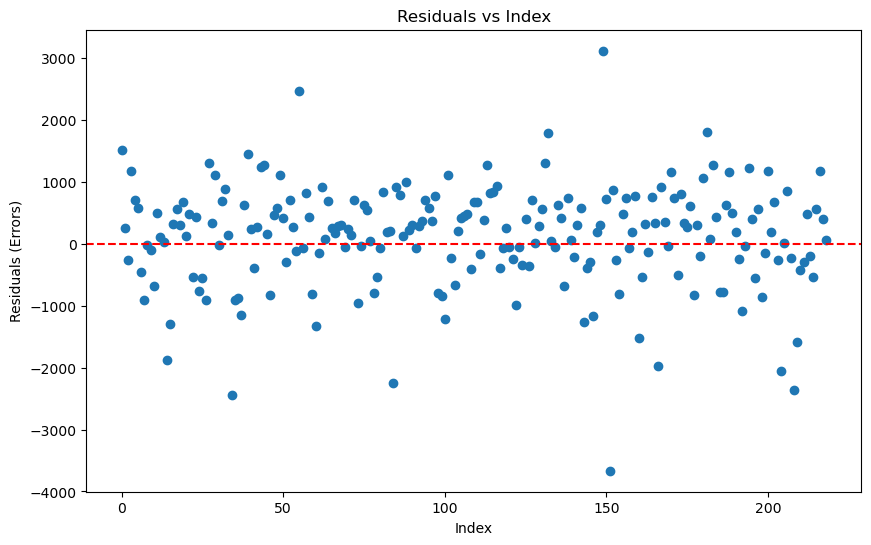

In [1545]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(res)), res)
plt.axhline(0, color='red', linestyle='--')  # Add a line at y=0 for reference
plt.title('Residuals vs Index')
plt.xlabel('Index')
plt.ylabel('Residuals (Errors)')
plt.show()

In [1475]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8198650888235195

### 7.3 Predict values for test data set

In [1316]:
#Scale variables in X_test
num_vars = ['temp','feels_temp','humidity','windspeed']


# Fit the scaler on data

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

year  holiday  workingday      temp  feels_temp  humidity  windspeed  \
468     1        0           0  0.543115    0.536771  0.518248   0.422104   
148     0        0           0  0.758058    0.704203  0.843709   0.479765   
302     0        0           0  0.324018    0.317998  0.642765   0.386287   
355     0        0           1  0.453814    0.455552  0.780592   0.062325   
515     1        0           1  0.773634    0.724915  0.507943   0.433030   

      cnt  season_Spring  season_Summer  ...  month_September  weekday_Monday  \
468  7460          False           True  ...            False           False   
148  4788          False           True  ...            False           False   
302  3331          False          False  ...            False           False   
355  3068           True          False  ...            False           False   
515  7338          False           True  ...            False           False   

     weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
468              True           False             False            False   
148             False            True             False            False   
302             False            True             False            False   
355             False           False              True            False   
515             False           False              True            False   

     weekday_Wednesday  weather_Clear  weather_Light rain  weather_Mist  
468              False           True               False         False  
148              False           True               False         False  
302              False           True               False         False  
355              False          False               False          True  
515              False           True               False         False  

[5 rows x 31 columns]

In [1317]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1318]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 468 to 314
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                219 non-null    int64  
 1   holiday             219 non-null    int64  
 2   workingday          219 non-null    int64  
 3   temp                219 non-null    float64
 4   feels_temp          219 non-null    float64
 5   humidity            219 non-null    float64
 6   windspeed           219 non-null    float64
 7   season_Spring       219 non-null    bool   
 8   season_Summer       219 non-null    bool   
 9   season_Winter       219 non-null    bool   
 10  month_August        219 non-null    bool   
 11  month_December      219 non-null    bool   
 12  month_February      219 non-null    bool   
 13  month_January       219 non-null    bool   
 14  month_July          219 non-null    bool   
 15  month_June          219 non-null    bool   
 16  month_March

In [1422]:
# cols=X_train_rfe.columns
# cols
X_test_sm = X_test[[ 'year', 'feels_temp', 'windspeed', 'season_Spring',
       'season_Winter', 'month_March', 'month_September', 'weather_Clear',
       'weather_Light rain']]


X_test_sm.columns

Index(['year', 'feels_temp', 'windspeed', 'season_Spring', 'season_Winter',
       'month_March', 'month_September', 'weather_Clear',
       'weather_Light rain'],
      dtype='object')

In [1430]:
X_test_sm = sm.add_constant(X_test_sm)

X_test_sm.head()

const  year  feels_temp  windspeed  season_Spring  season_Winter  \
468    1.0     1    0.536771   0.422104          False          False   
148    1.0     0    0.704203   0.479765          False          False   
302    1.0     0    0.317998   0.386287          False           True   
355    1.0     0    0.455552   0.062325           True          False   
515    1.0     1    0.724915   0.433030          False          False   

     month_March  month_September  weather_Clear  weather_Light rain  
468        False            False           True               False  
148        False            False           True               False  
302        False            False           True               False  
355        False            False          False               False  
515        False            False           True               False

In [1432]:
X_test_sm.info()

# y_test_pred = lm.predict(X_test_sm)

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 468 to 314
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               219 non-null    float64
 1   year                219 non-null    int64  
 2   feels_temp          219 non-null    float64
 3   windspeed           219 non-null    float64
 4   season_Spring       219 non-null    bool   
 5   season_Winter       219 non-null    bool   
 6   month_March         219 non-null    bool   
 7   month_September     219 non-null    bool   
 8   weather_Clear       219 non-null    bool   
 9   weather_Light rain  219 non-null    bool   
dtypes: bool(6), float64(3), int64(1)
memory usage: 9.8 KB


In [1428]:
X_train_rfe.columns

Index(['const', 'year', 'feels_temp', 'windspeed', 'season_Spring',
       'season_Winter', 'month_March', 'month_September', 'weather_Clear',
       'weather_Light rain'],
      dtype='object')

In [1434]:
y_test_pred = lm.predict(X_test_sm)

In [1440]:
res=y_test-y_test_pred
res

468    1518.812823
148     251.312219
302    -261.169685
355    1172.943746
515      702.05282
          ...     
332    -531.960643
532     556.497289
558    1171.004477
137     391.696512
314      55.067316
Length: 219, dtype: object

In [1442]:
r2_score(y_test,y_test_pred)

0.8090867815590187

Text(0, 0.5, 'y_test_pred')

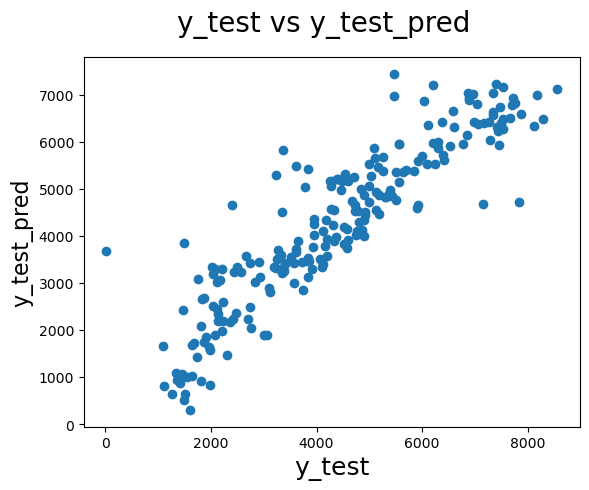

In [1444]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)     

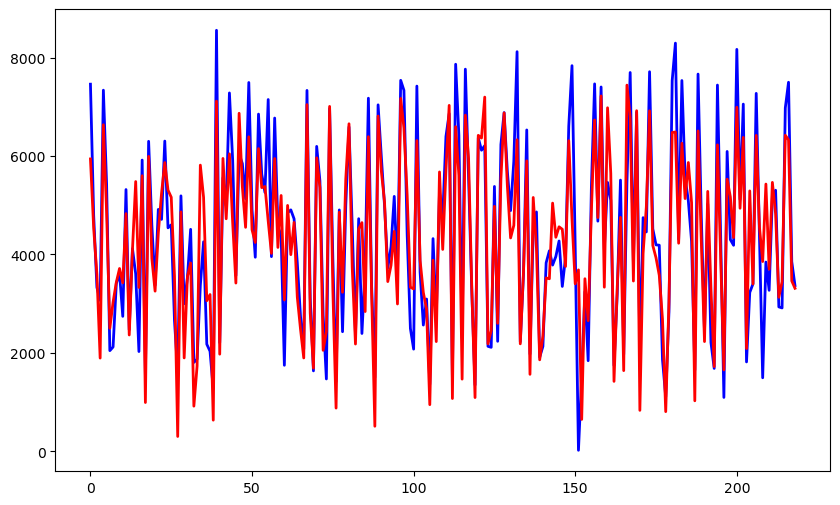

In [1540]:
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test.values, label='Actual', color='blue', linewidth=2)

# Plot predicted values
plt.plot(y_test_pred.values, label='Predicted', color='red', linewidth=2)

## <font color='red'> Final Recommendations for the Company: </font>

- The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
- Company should focus on expanding business during Spring